# Contexte:
Vous êtes Data Scientist au sein d'une société financière, nommée "Prêt à dépenser", qui propose des crédits à la consommation pour des personnes ayant peu ou pas du tout d'historique de prêt.

L’entreprise souhaite mettre en œuvre un outil de “scoring crédit” pour calculer la probabilité qu’un client rembourse son crédit, puis classifie la demande en crédit accordé ou refusé. Elle souhaite donc développer un algorithme de classification en s’appuyant sur des sources de données variées (données comportementales, données provenant d'autres institutions financières, etc.).

De plus, les chargés de relation client ont fait remonter le fait que les clients sont de plus en plus demandeurs de transparence vis-à-vis des décisions d’octroi de crédit. Cette demande de transparence des clients va tout à fait dans le sens des valeurs que l’entreprise veut incarner.

Prêt à dépenser décide donc de développer un dashboard interactif pour que les chargés de relation client puissent à la fois expliquer de façon la plus transparente possible les décisions d’octroi de crédit, mais également permettre à leurs clients de disposer de leurs informations personnelles et de les explorer facilement. 

## Votre mission
- Construire un modèle de scoring qui donnera une prédiction sur la probabilité de faillite d'un client de façon automatique.
- Construire un dashboard interactif à destination des gestionnaires de la relation client permettant d'interpréter les prédictions faites par le modèle, et d’améliorer la connaissance client des chargés de relation client.
- Mettre en production le modèle de scoring de prédiction à l’aide d’une API, ainsi que le dashboard interactif qui appelle l’API pour les prédictions.

Michaël, votre manager, vous incite à sélectionner un ou des kernels Kaggle pour vous faciliter l’analyse exploratoire, la préparation des données et le feature engineering nécessaires à l’élaboration du modèle de scoring. Si vous le faites, vous devez analyser ce ou ces kernels et le ou les adapterpour vous assurer qu’ils répond(ent) aux besoins de votre mission.

# 1.1 Installation et imports de librairies

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

# 1.2 Import du dataset

In [3]:
path = 'C:/Users/valev/OneDrive/Documents/Formation DS/Projet 7/Données/Projet+Mise+en+prod+-+home-credit-default-risk/'

In [4]:
app_train = pd.read_csv(path+'application_train.csv')
app_test = pd.read_csv(path+'application_test.csv')
bureau_balance = pd.read_csv(path+'bureau_balance.csv')
bureau = pd.read_csv(path+'bureau.csv')
installments_payments = pd.read_csv(path+ 'installments_payments.csv')
POS_CASH_balance = pd.read_csv(path+ 'POS_CASH_balance.csv')
credit_card_balance = pd.read_csv(path+'credit_card_balance.csv')
previous_application = pd.read_csv(path+ 'previous_application.csv')
gc.collect()

test_index = app_test['SK_ID_CURR'] # Store test index

In [5]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [10]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [11]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [12]:
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [13]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [14]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def basic_details(df):
    """ Returns basic details of features in dataset"""
    k = pd.DataFrame()
    k['missing_value'] = df.isnull().sum()
    k['%missing_value'] = round(df.isnull().sum()*100/df.shape[0],2)
    k['dtypes'] = df.dtypes
    k['N unique'] = df.nunique()
    #k['mean'] = df.mean()
    return k

In [7]:
# Fill missing value with mode
def missing_value_fill(df ,columns, mean_or_mode='mode'):
    """ Fill missing value with
        mode: for categorical variable
        mean: for numerical variable"""
    for i in columns:
        if (df[i].isnull().sum()>0) and (mean_or_mode =='mode'):
            df[i].fillna(df[i].mode()[0], inplace=True)
        elif (df[i].isnull().sum()>0) and (mean_or_mode =='mean'):
            df[i].fillna(df[i].mean(), inplace=True)

In [8]:
# Replace missing value np.nan
def replace_XNA_XAP(df):
    "Replace XNA,XAP"
    df.replace(to_replace = {'XNA':np.nan,'XAP':np.nan},inplace=True,value= None)
    return df

# 1.3 Fonction one hot encoding

In [9]:
def one_hot_encoding(df,columns,nan_as_category = True):
    """ One hot encoding of categorical variable"""
    print('*'*5,'One hot encoding of categorical variable','*'*5)
    print('Original shape',df.shape)
    original_columns = df.columns
    # One hot encoding using get dummies function
    df = pd.get_dummies(df, columns= columns,drop_first=True,dummy_na=nan_as_category)
    new_columns = [i for i in df.columns if i not in original_columns]
    print('After OHE',df.shape)
    return df,new_columns

In [10]:
def descriptive_stat_feat(df,columns):
    """ Descriptive statistics feature
    genarating function: Mean,Median,Q1,Q3"""
    print('*'*5,'Descriptive statistics feature','*'*5)
    print('Before',df.shape)
    mean = df[columns].mean()
    median = df[columns].median()
    Q1 = np.percentile(df[columns], 25, axis=0)
    Q3 = np.percentile(df[columns], 75, axis=0)
    for i,j in enumerate(columns):
        df['mean_'+j] = (df[j] < mean[i]).astype('int8')
        df['median_'+j] = (df[j] > median[i]).astype('int8')
        df['Q1'+j] = (df[j] < Q1[i]).astype('int8')
        df['Q3'+j] = (df[j] > Q3[i]).astype('int8')
    print('After ',df.shape)

In [11]:
def binary_encoding(df,columns):
    """Binary encoding"""
    print('*'*5,'Binary encoding','*'*5)
    lb = LabelBinarizer()
    print('Original shape:',df.shape)
    original_col = df.columns
    #columns = [i for i in columns if df[columns].nunique()>2]
    for i in columns:
        if df[i].nunique() >2:
            result = lb.fit_transform(df[i].fillna(df[i].mode()[0],axis=0))
            col = ['BIN_'+ str(i)+'_'+str(c) for c in lb.classes_]
            result1 = pd.DataFrame(result, columns=col)
            df = df.join(result1)
    print('After:',df.shape)
    new_col = [c for c in df.columns if c not in original_col]
    return df, new_col

In [12]:
def dist_box__plot_with_log(df,column,ncols=2,Trans_func= None):
    """Plot distribution plot with log on different target value
    Can be used for train/ test dataset
    Trans_fucn: log, log1p, exp, sqrt, expm1...
    """
    # Apply natural log on total income
    fig,a = plt.subplots(nrows=1,ncols=ncols,figsize=(14,4))
    # Box plot
    ax = plt.subplot(1,ncols,1)    
    sns.boxplot(x ='TARGET', y=column, data=df,ax=ax,palette='RdYlGn_r')
    plt.title('Boxplot')
    
    tmp_0 = df[df['TARGET']==1][column].dropna()
    tmp_1 = df[df['TARGET']==0][column].dropna()
    # Distribution plot    
    ax = plt.subplot(1,ncols,2)    
    sns.distplot(tmp_0,ax=ax,color='orange',label='Target=1',hist=False)
    sns.distplot(tmp_1,ax=ax,color='green',label='Target=0',hist=False)
    ax.set_title('Distribution plot')
    
    # Distribution plot with log(x+1) on column
    if Trans_func !=None:
        ax = plt.subplot(1,ncols,3)
        tmp_0 = df[df['TARGET']==1][column].dropna().apply(Trans_func)
        tmp_1 = df[df['TARGET']==0][column].dropna().apply(Trans_func)
        sns.distplot(np.log1p(tmp_0), ax=ax,color='orange',label='Target=1',hist=False)
        sns.distplot(np.log1p(tmp_1), ax=ax,color='green',label='Target=0',hist=False)
        ax.set_title('${}$'.format(Trans_func))
    
    plt.tight_layout()
    plt.legend()

In [13]:
def box_dist_plot_with_trans(df,column,nrows=1,ncols=2,Trans_func=None):
    """Dirtibution plot and Box plot 
    log,log1p,exp,sqrt,expm1.. numpy function
    """
    fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(14,4*nrows))
    
    # Box plot
    ax = plt.subplot(nrows,ncols,1)
    sns.boxplot(x =column, data=df,ax=ax)
    ax.set_title('Box plot')
    
    # Distribution plot
    ax = plt.subplot(nrows,ncols,2)
    sns.distplot(df[column].dropna(),ax=ax,color='blue',bins=30)
    ax.set_title('Distribution plot')
    
    # Transformation plot
    if Trans_func !=None:
        tmp = df[column].dropna().apply(Trans_func)
        ax = plt.subplot(nrows,ncols,3)
        sns.distplot(tmp,ax=ax,color='red',bins=30)
        ax.set_title('${}$'.format(Trans_func))
      
    plt.tight_layout()

---
---
---
# 2 Application train/test dataset¶
## 2.0 Glimpse Application train / test dataset

In [14]:
print('Number of rows and columns in train dataset: ',app_train.shape)
app_train.head()

Number of rows and columns in train dataset:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
print('Number of rows and columns in test dataset: ',app_test.shape)
app_test.head()

Number of rows and columns in test dataset:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
pd.read_csv(path+'sample_submission.csv').head()

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


## 2.1 Colonnes

In [16]:
app_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

## 2.2 Colonnes

In [17]:
test_index = app_test['SK_ID_CURR']
app_train_col_drop = []

In [18]:
print('Count\n',app_train['TARGET'].value_counts())
print('%\n',app_train['TARGET'].value_counts()*100/app_train.shape[0])

Count
 0    282686
1     24825
Name: TARGET, dtype: int64
%
 0    91.927118
1     8.072882
Name: TARGET, dtype: float64


<AxesSubplot: xlabel='TARGET', ylabel='count'>

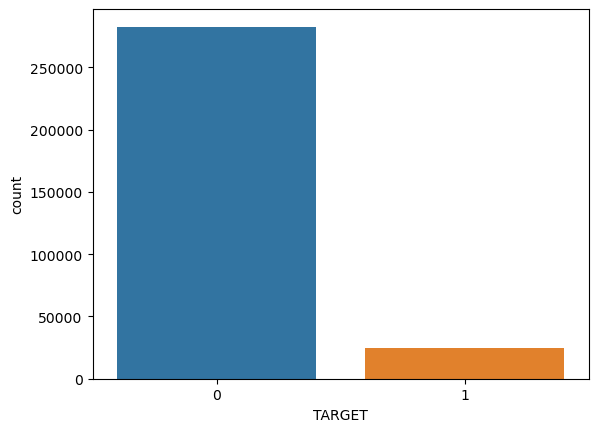

In [19]:
#Digramme en barres des deux classes de la target
sns.countplot(x=app_train['TARGET'])

Text(0.5, 1.0, 'Diagramme circulaire de la répartition des clients qui remboursent ou non')

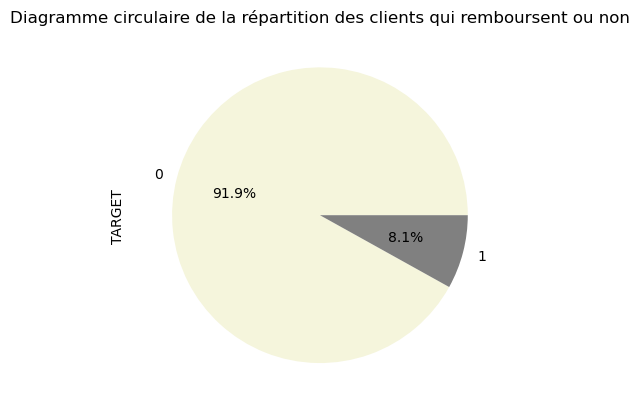

In [32]:
#Countplot des deux classes de la target
app_train['TARGET'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=['beige', 'grey']).set_title("Diagramme circulaire de la répartition des clients qui remboursent ou non")

Les 0 remboursent leur emprunt à temps, tandis que les 1 ne les remboursent pas à temps, donc seulement 8% des remboursements de prêt arrivent en retard.

## 2.3 Variable binaire
- NAME_CONTRACT_TYPE: Identification si le prêt est en espèce ou renouvelable
- FLAG_OWN_REALTY: "Drapeau" si le client possède une maison ou un appartement

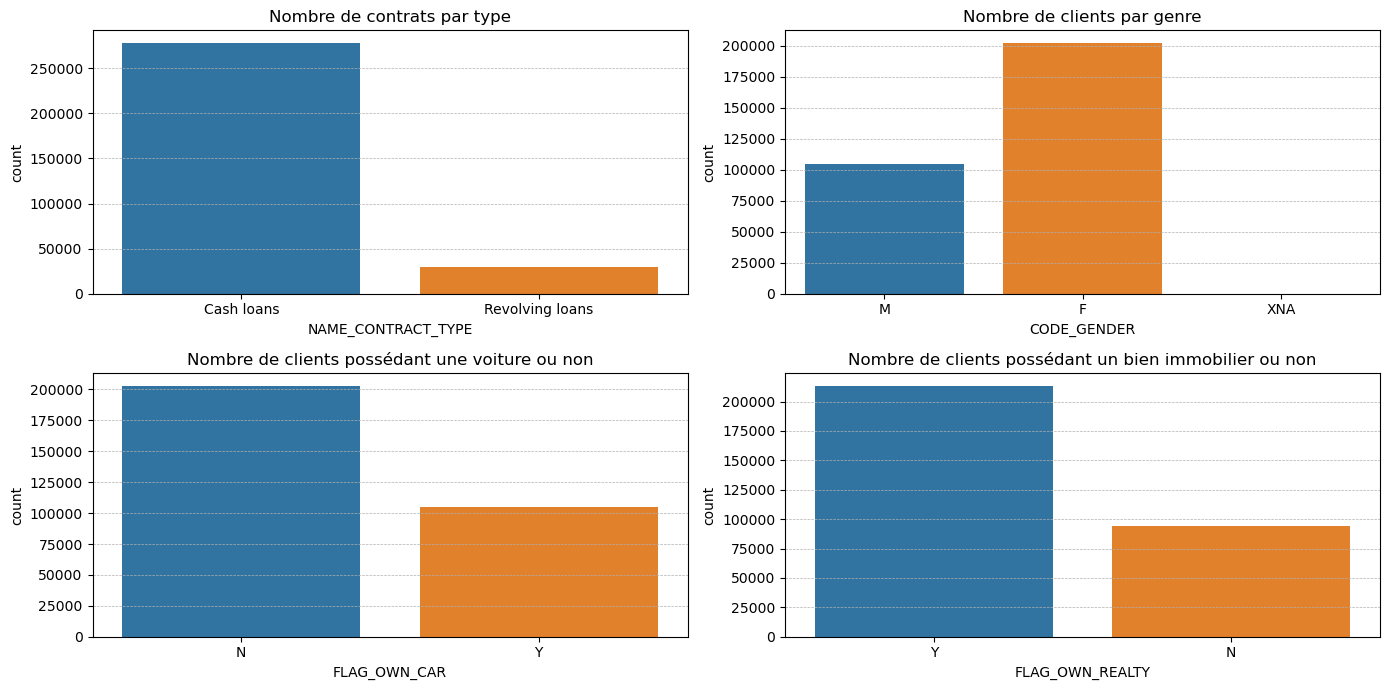

In [19]:
f =plt.figure(figsize=(14,7))
ax= f.add_subplot(221)
plt.grid(linestyle = '--', linewidth = 0.5)
sns.countplot(x=app_train['NAME_CONTRACT_TYPE']).set_title("Nombre de contrats par type")
ax=f.add_subplot(222)
plt.grid(linestyle = '--', linewidth = 0.5)
sns.countplot(x=app_train['CODE_GENDER']).set_title("Nombre de clients par genre")
ax=f.add_subplot(223)
plt.grid(linestyle = '--', linewidth = 0.5)
sns.countplot(x=app_train['FLAG_OWN_CAR']).set_title("Nombre de clients possédant une voiture ou non")
ax=f.add_subplot(224)
plt.grid(linestyle = '--', linewidth = 0.5)
sns.countplot(x=app_train['FLAG_OWN_REALTY']).set_title("Nombre de clients possédant un bien immobilier ou non")
plt.tight_layout()

In [20]:
# convert to categorical type
app_train[['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']] =   app_train[
    ['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']].astype('object')
app_test[['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']] =   app_test[
    ['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']].astype('object')

## 2.4 Nombre d'enfants
Nombre d'enfants que le client a

In [21]:
tmp = app_train['CNT_CHILDREN'].value_counts().to_frame()
tmp['%'] = (app_train['CNT_CHILDREN'].value_counts() *100 / app_train.shape[0])
tmp

,CNT_CHILDREN,%
0,215371,70.036844
1,61119,19.875387
2,26749,8.698551
3,3717,1.208737
4,429,0.139507
5,84,0.027316
6,21,0.006829
7,7,0.002276
14,3,0.000976
8,2,0.000650


In [22]:
# convert to categorical type
app_train['CNT_CHILDREN'] = app_train['CNT_CHILDREN'].astype('object')
app_test['CNT_CHILDREN'] = app_test['CNT_CHILDREN'].astype('object')

## 2.5 Montant du revenu total

In [23]:
app_train[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',]].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05
mean,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05
std,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06


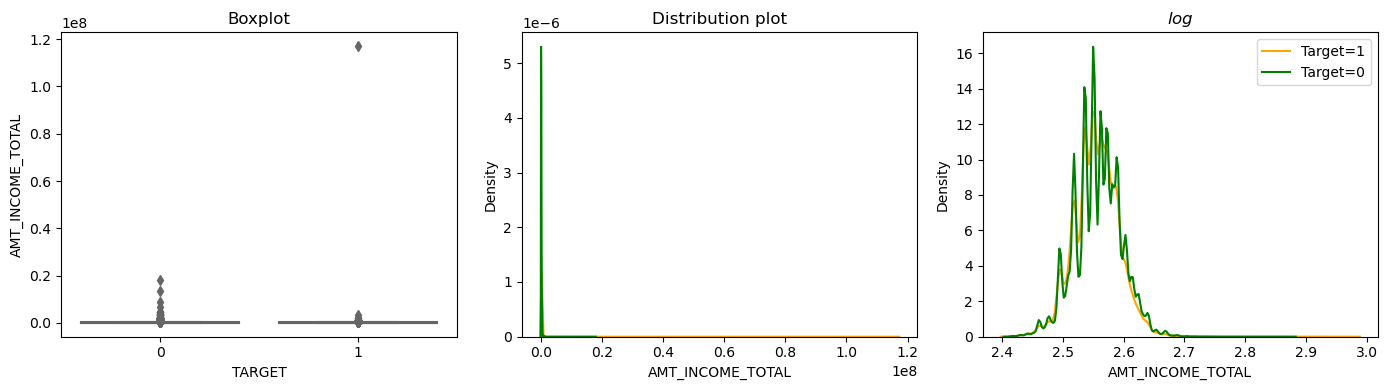

In [27]:
dist_box__plot_with_log(app_train,column='AMT_INCOME_TOTAL',ncols=3,Trans_func='log')

In [28]:
print('Default',app_train[app_train['AMT_INCOME_TOTAL'] >0.2e8]['AMT_INCOME_TOTAL'])

# apply log on feature 
app_train['AMT_INCOME_TOTAL'] = np.log(app_train['AMT_INCOME_TOTAL'])
app_test['AMT_INCOME_TOTAL'] = np.log(app_test['AMT_INCOME_TOTAL'])

Default 12840    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64


Il y a beaucoup de prêts de personnes à revenu élevé qui ne sont pas remboursés à temps

## 2.6 Montant du crédit

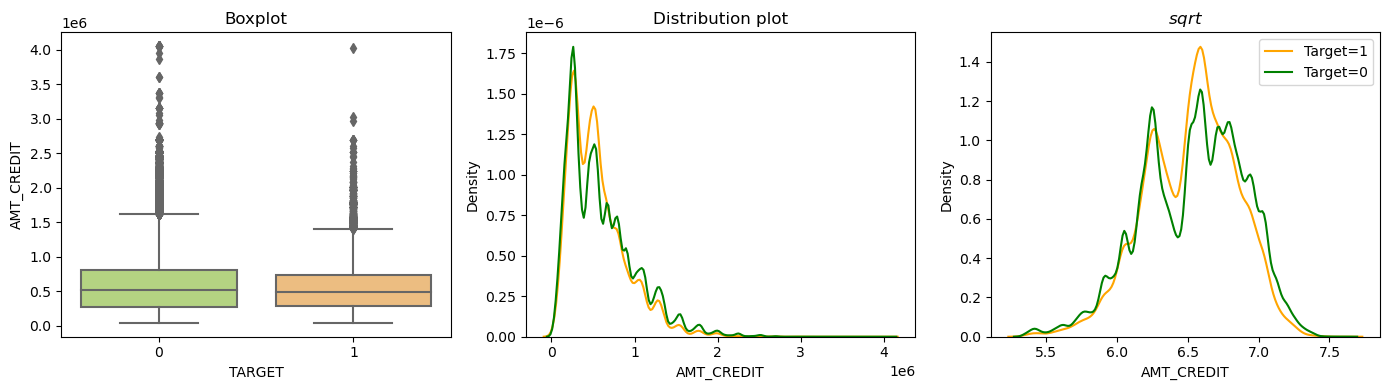

In [29]:
dist_box__plot_with_log(app_train,column='AMT_CREDIT',ncols=3,Trans_func='sqrt')

In [30]:
# apply square root on feature
app_train['AMT_CREDIT'] = np.sqrt(app_train['AMT_CREDIT'])
app_test['AMT_CREDIT'] = np.sqrt(app_test['AMT_CREDIT'])

## 2.7 Montant de l'annuité

Le montant de l'annuité est remboursé en versements de même taille composés d'une partie de remboursement du prêt et d'une partie d'intérêts. Le montant de la mensualité change en fonction de l'évolution des taux d'intérêt, mais la durée du prêt reste inchangée.

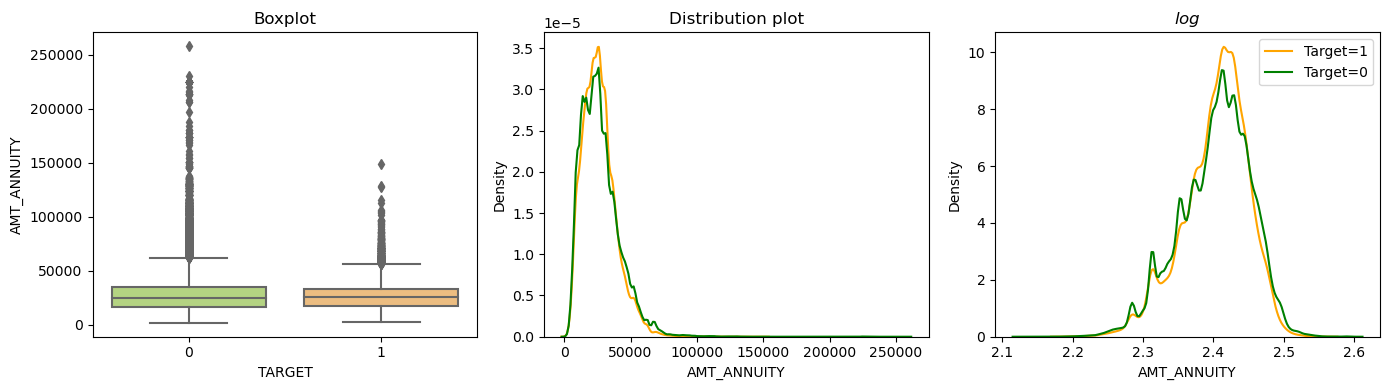

In [31]:
dist_box__plot_with_log(app_train,column='AMT_ANNUITY',ncols=3,Trans_func='log')

In [32]:
# apply log on feature
app_train['AMT_ANNUITY'] = np.log(app_train['AMT_ANNUITY'])
app_test['AMT_ANNUITY'] = np.log(app_test['AMT_ANNUITY'])

## 2.8 Montant du prix des marchandises
Pour les prêts à la consommation c'est le prix des biens pour lesquels le prêt est accordé

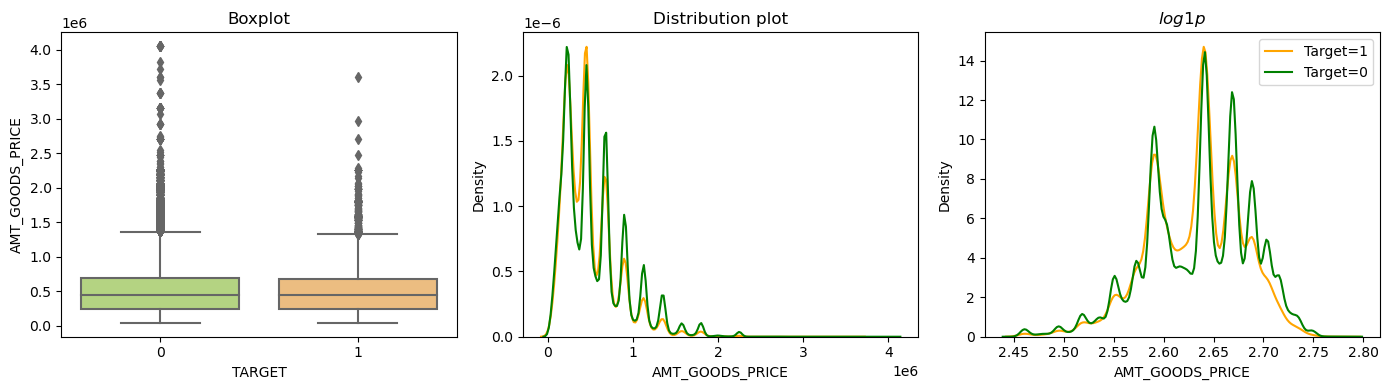

In [33]:
dist_box__plot_with_log(app_train,column='AMT_GOODS_PRICE',ncols=3,Trans_func='log1p')

## 2.9 Informations personnelles

In [38]:
tmp.values

array([248526,  40149,  11370,   3267,   1770,    866,    271],
      dtype=int64)

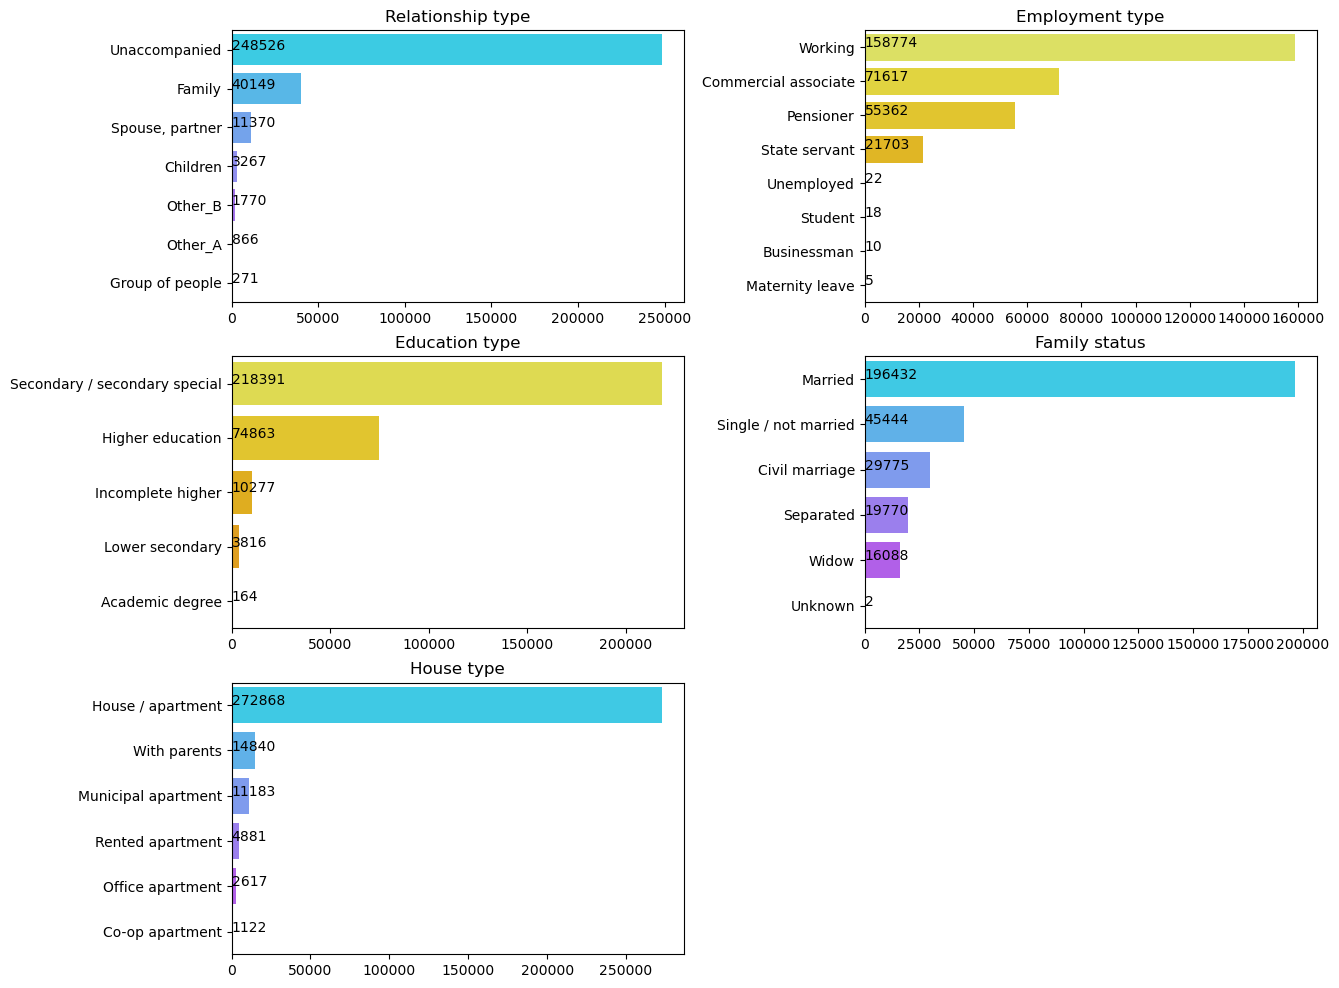

In [41]:
f = plt.figure(figsize= (14,12))
#plt.pie(tmp.values,labels=tmp.index,autopct='%1.1f%%',colors=sns.color_palette('cool'))

ax= f.add_subplot(321)
tmp = app_train['NAME_TYPE_SUITE'].value_counts()
sns.barplot(x=tmp.values,y=tmp.index,palette='cool')
for i, v in enumerate(tmp.values):
    ax.text(0.8,i,v,color='k',fontsize=10)
ax.set_title('Relationship type')

ax = f.add_subplot(322)
tmp = app_train['NAME_INCOME_TYPE'].value_counts()
sns.barplot(x=tmp.values,y=tmp.index,palette='Wistia')
for i, v in enumerate(tmp.values):
    ax.text(0.8,i,v,color='k',fontsize=10)
ax.set_title('Employment type')

ax = f.add_subplot(323)
tmp = app_train['NAME_EDUCATION_TYPE'].value_counts()
sns.barplot(x=tmp.values,y=tmp.index,palette='Wistia')
for i, v in enumerate(tmp.values):
    ax.text(0.8,i,v,color='k',fontsize=10)
ax.set_title('Education type')

ax = f.add_subplot(324)
tmp = app_train['NAME_FAMILY_STATUS'].value_counts()
sns.barplot(x=tmp.values,y=tmp.index,palette='cool')
for i, v in enumerate(tmp.values):
    ax.text(0.8,i,v,color='k',fontsize=10)
ax.set_title('Family status')

ax = f.add_subplot(325)
tmp = app_train['NAME_HOUSING_TYPE'].value_counts()
sns.barplot(x=tmp.values,y=tmp.index,palette='cool')
for i, v in enumerate(tmp.values):
    ax.text(0.8,i,v,color='k',fontsize=10)
ax.set_title('House type')

plt.subplots_adjust(wspace=0.4)

In [42]:
# convert to categorical type
app_train[['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 
           'NAME_HOUSING_TYPE']] = app_train[['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']].astype('object')

app_test[['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 
           'NAME_HOUSING_TYPE']] = app_test[['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']].astype('object')

## 2.10 Population relative de la région
Population normalisée de la région où vit le client (un nombre plus élevé signifie que le client vit dans une région plus peuplée)

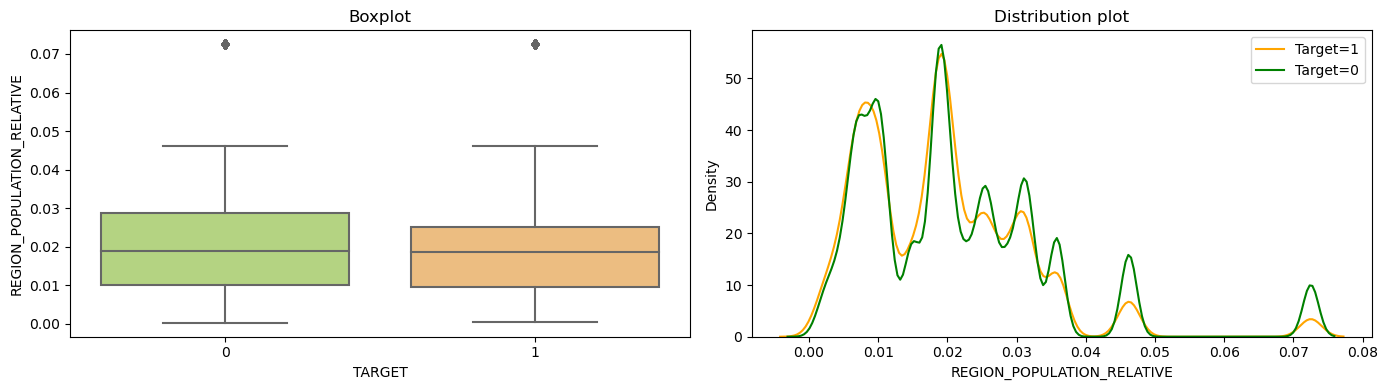

In [43]:
dist_box__plot_with_log(app_train,column='REGION_POPULATION_RELATIVE', ncols=2)

## 2.11 Jours depuis la naissance
Âge du client en jours au moment de la demande

In [44]:
(app_train['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

C:\Users\valev\AppData\Local\Temp\ipykernel_69060\3046177474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['DAYS_BIRTH'] = tmp['DAYS_BIRTH']/-365


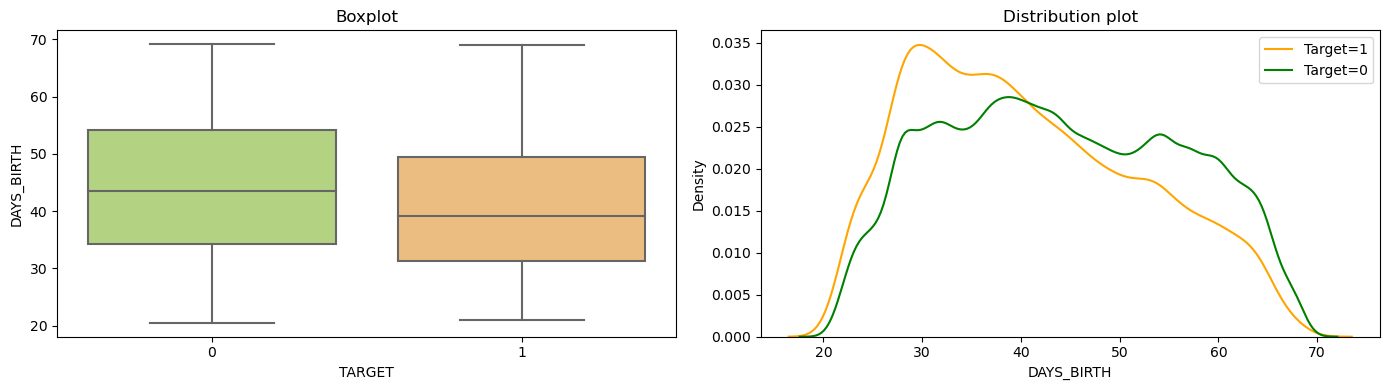

In [47]:
tmp = app_train[['TARGET','DAYS_BIRTH']]
tmp['DAYS_BIRTH'] = tmp['DAYS_BIRTH']/-365
dist_box__plot_with_log(tmp,'DAYS_BIRTH')

La médiane de l'âge des clients avec des difficultés de paiements est plus basse que celle de ceux qui n'ont pas de difficulté. 

## 2.14 Nombre de jours employé
Depuis combien de jours avant la demande la personne a-t-elle commencé son emploi actuel 

In [49]:
print('missing value:',app_train['DAYS_EMPLOYED'].isnull().sum())
(app_train['DAYS_EMPLOYED']/-365).describe()

missing value: 0


count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

In [50]:
((app_train['DAYS_EMPLOYED']/-365)[(app_train['DAYS_EMPLOYED']/-365)<0][:5],
app_train['DAYS_EMPLOYED'][app_train['DAYS_EMPLOYED']>0][:5],
app_test['DAYS_EMPLOYED'][app_test['DAYS_EMPLOYED']>0][:5])

(8    -1000.665753
 11   -1000.665753
 23   -1000.665753
 38   -1000.665753
 43   -1000.665753
 Name: DAYS_EMPLOYED, dtype: float64,
 8     365243
 11    365243
 23    365243
 38    365243
 43    365243
 Name: DAYS_EMPLOYED, dtype: int64,
 10    365243
 17    365243
 22    365243
 26    365243
 36    365243
 Name: DAYS_EMPLOYED, dtype: int64)

In [51]:
# fill missing value
app_train['DAYS_EMPLOYED'].replace({365243:np.nan},inplace=True)
app_test['DAYS_EMPLOYED'].replace({365243:np.nan},inplace=True)

C:\Users\valev\AppData\Local\Temp\ipykernel_69060\644065878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['DAYS_EMPLOYED'] = tmp['DAYS_EMPLOYED']/-365


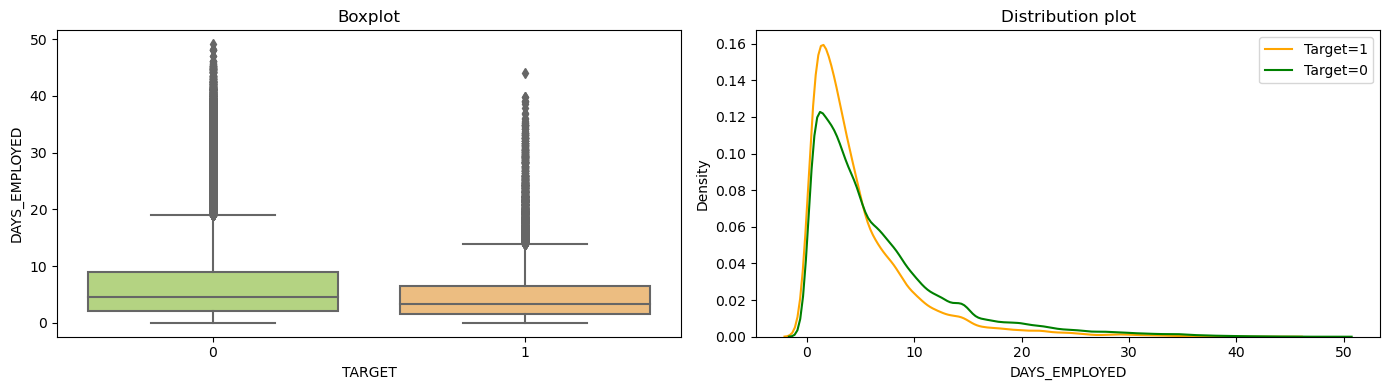

In [52]:
tmp = app_train[['TARGET','DAYS_EMPLOYED']]
tmp['DAYS_EMPLOYED'] = tmp['DAYS_EMPLOYED']/-365
dist_box__plot_with_log(tmp,'DAYS_EMPLOYED')

La médiane du nombre de jours depuis lesquels les clients ont été employées est moins élevée pour les personnes ayant eu récemment des difficultés de paiement que pour les personnes n'en ayant pas eu.

## 2.15 Jour d'inscription
Combien de jours avant la demande le client a-t-il modifié son inscription

In [53]:
(app_train['DAYS_REGISTRATION']/-365).describe()

count    307511.000000
mean         13.660604
std           9.651743
min          -0.000000
25%           5.506849
50%          12.339726
75%          20.491781
max          67.594521
Name: DAYS_REGISTRATION, dtype: float64

C:\Users\valev\AppData\Local\Temp\ipykernel_69060\4179152504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['DAYS_REGISTRATION'] = tmp['DAYS_REGISTRATION']/-365


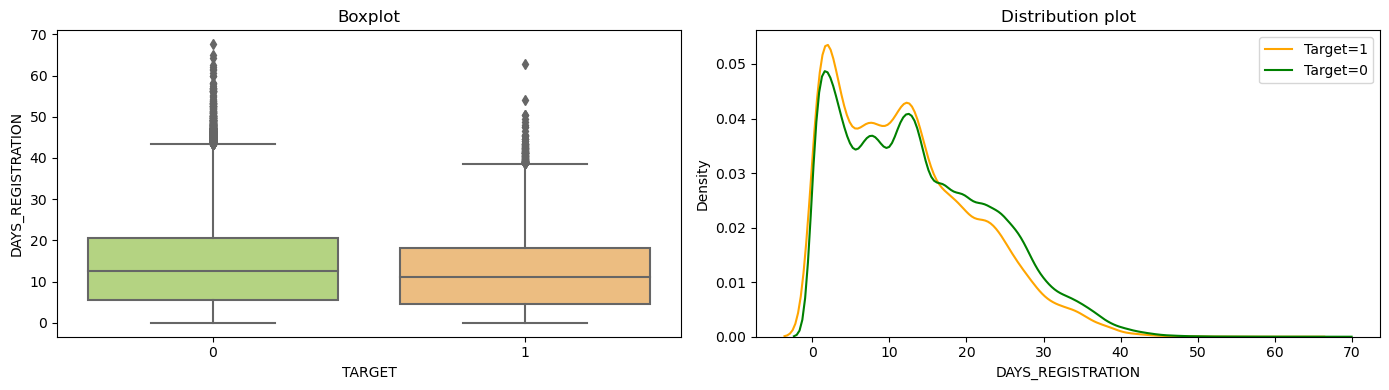

In [54]:
tmp = app_train[['TARGET','DAYS_REGISTRATION']]
tmp['DAYS_REGISTRATION'] = tmp['DAYS_REGISTRATION']/-365
dist_box__plot_with_log(tmp,'DAYS_REGISTRATION')

## 2.16 Jours avant le changement de pièce d'identité
Combien de jours avant la demande le client a-t-il changé la pièce d'identité avec laquelle il a demandé le prêt

In [55]:
(app_train['DAYS_ID_PUBLISH']/-365).describe()

count    307511.000000
mean          8.203294
std           4.135481
min          -0.000000
25%           4.712329
50%           8.915068
75%          11.778082
max          19.717808
Name: DAYS_ID_PUBLISH, dtype: float64

C:\Users\valev\AppData\Local\Temp\ipykernel_69060\938746536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['DAYS_ID_PUBLISH'] = tmp['DAYS_ID_PUBLISH']/-365


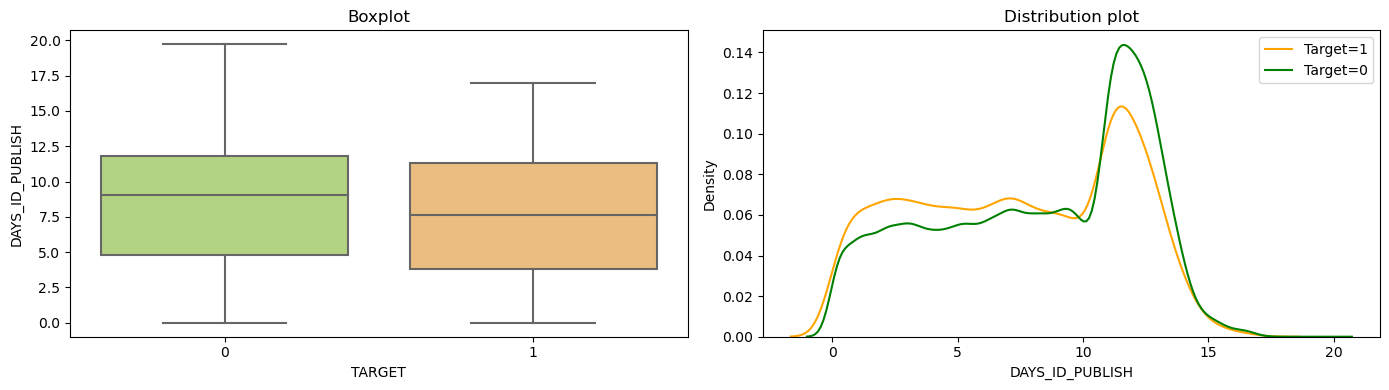

In [56]:
tmp = app_train[['TARGET','DAYS_ID_PUBLISH']]
tmp['DAYS_ID_PUBLISH'] = tmp['DAYS_ID_PUBLISH']/-365
dist_box__plot_with_log(tmp,'DAYS_ID_PUBLISH')

## 2.17 Âge de la voiture possédée
Âge de la voiture du client

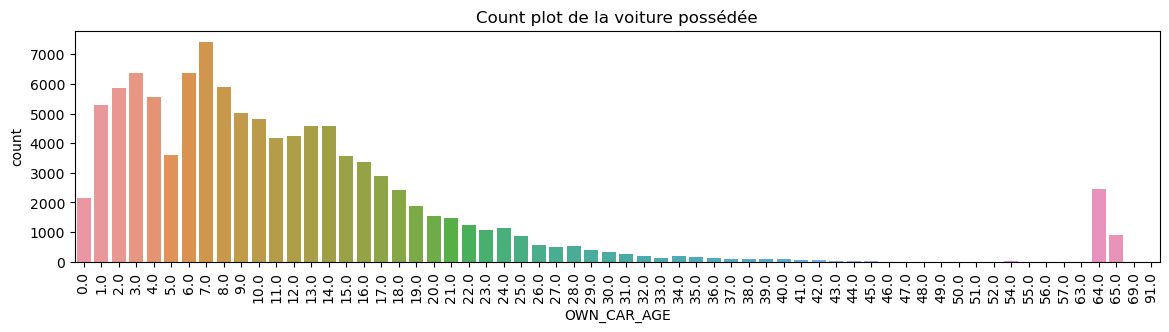

In [61]:
plt.figure(figsize= (14,3))
sns.countplot(x=app_train['OWN_CAR_AGE'])
plt.title('Count plot de la voiture possédée')
plt.xticks(rotation=90);

In [62]:
app_train['OWN_CAR_AGE'] = app_train['OWN_CAR_AGE'].astype('object')
app_test['OWN_CAR_AGE'] = app_test['OWN_CAR_AGE'].astype('object')

## 2.18 Disponibilité pour la communication

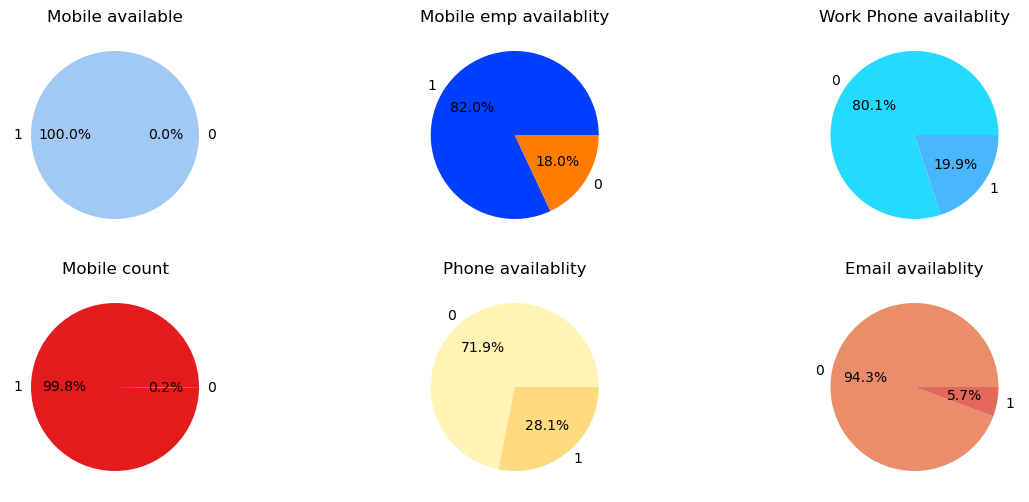

In [72]:
f = plt.figure(figsize= (14,6))

ax= f.add_subplot(231)
tmp = app_train['FLAG_MOBIL'].value_counts()
plt.pie(tmp.values,labels=tmp.index,autopct='%1.1f%%',colors=sns.color_palette('pastel'))
ax.set_title('Mobile available')

ax = f.add_subplot(232)
tmp = app_train['FLAG_EMP_PHONE'].value_counts()
plt.pie(tmp.values,labels=tmp.index,autopct='%1.1f%%',colors=sns.color_palette('bright'))
ax.set_title('Mobile emp availablity')

ax = f.add_subplot(233)
tmp = app_train['FLAG_WORK_PHONE'].value_counts()
plt.pie(tmp.values,labels=tmp.index,autopct='%1.1f%%',colors=sns.color_palette('cool'))
ax.set_title('Work Phone availablity')

ax = f.add_subplot(234)
tmp = app_train['FLAG_CONT_MOBILE'].value_counts()
plt.pie(tmp.values,labels=tmp.index,autopct='%1.1f%%',colors=sns.color_palette('Set1'))
ax.set_title('Mobile count')

ax = f.add_subplot(235)
tmp = app_train['FLAG_PHONE'].value_counts()
plt.pie(tmp.values,labels=tmp.index,autopct='%1.1f%%',colors=sns.color_palette('YlOrBr'))
ax.set_title('Phone availablity')

ax = f.add_subplot(236)
tmp = app_train['FLAG_EMAIL'].value_counts()
plt.pie(tmp.values,labels=tmp.index,autopct='%1.1f%%',colors=sns.color_palette('flare'))
ax.set_title('Email availablity')

plt.subplots_adjust(wspace=0.4)

In [73]:
# drop few columns
app_train_col_drop.append('FLAG_MOBIL')
app_train_col_drop.append('FLAG_CONT_MOBILE')
app_train_col_drop.append('FLAG_EMAIL')

# convert to category
app_train[['FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_PHONE']] = app_train[[
    'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_PHONE']].astype('object')
app_test[['FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_PHONE']] = app_test[[
    'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_PHONE']].astype('object')

## 2.19 Nombre de membres de la famille
Combien de membres le clients a-t-il dans sa famille

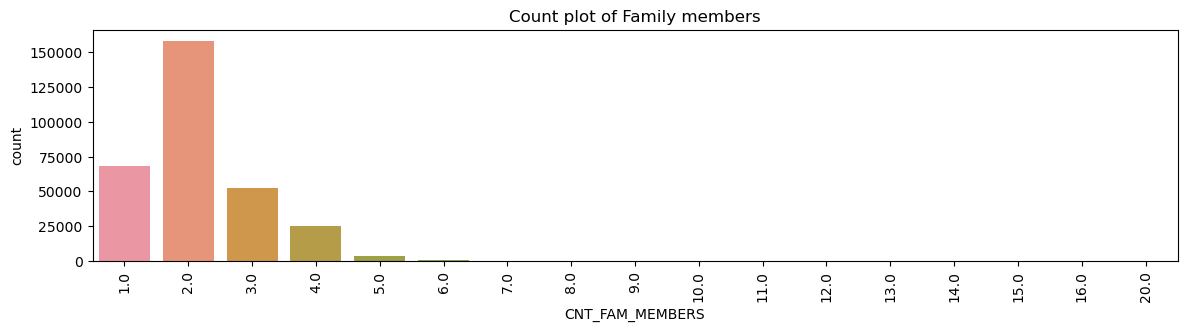

In [75]:
plt.figure(figsize= (14,3))
sns.countplot(x=app_train['CNT_FAM_MEMBERS'])
plt.title('Count plot of Family members')
plt.xticks(rotation=90);

In [76]:
# convert to category
app_train['CNT_FAM_MEMBERS'] = app_train['CNT_FAM_MEMBERS'].astype('object')
app_test['CNT_FAM_MEMBERS'] = app_test['CNT_FAM_MEMBERS'].astype('object')

## 2.20 Evaluation de la région du client
Evaluation de la région où le client vit (1,2,3)

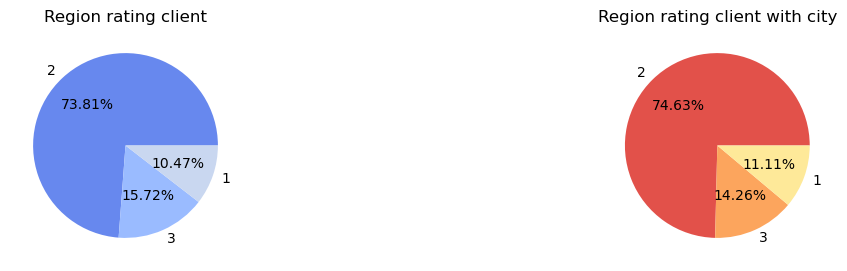

In [77]:
f = plt.figure(figsize= (14,3))

ax = f.add_subplot(121)
tmp = app_train['REGION_RATING_CLIENT'].value_counts()
ax.pie(tmp.values, labels= tmp.index, autopct= '%1.2f%%',colors=sns.color_palette('coolwarm'))
ax.set_title('Region rating client')

ax = f.add_subplot(122)
tmp = app_train['REGION_RATING_CLIENT_W_CITY'].value_counts()
ax.pie(tmp.values, labels= tmp.index, autopct= '%1.2f%%',colors=sns.color_palette('Spectral'))
ax.set_title('Region rating client with city');

In [78]:
# convert to category
app_train[['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']] = app_train[[
    'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']].astype('object')

app_test[['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']] = app_test[[
    'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']].astype('object')

## 2.21 Jour de la semaine de demande de prêt
Quel jour de la semaine le client a-t-il demandé le prêt

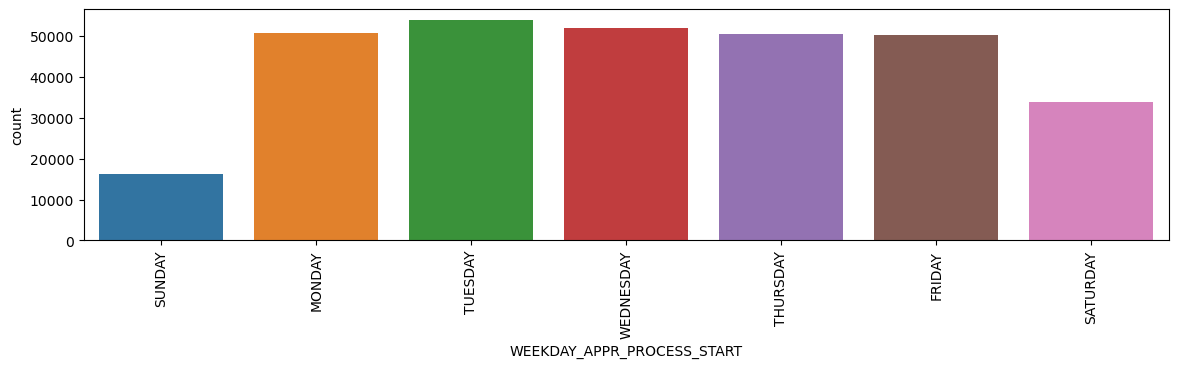

In [80]:
plt.figure(figsize= (14,3))
sns.countplot(x=app_train['WEEKDAY_APPR_PROCESS_START'],
              order=['SUNDAY','MONDAY','TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY','SATURDAY', ])
#plt.title('Count plot of Own car age')
plt.xticks(rotation=90);

In [81]:
# convert to category
app_train['WEEKDAY_APPR_PROCESS_START'] = app_train['WEEKDAY_APPR_PROCESS_START'].astype('object')
app_test['WEEKDAY_APPR_PROCESS_START'] = app_test['WEEKDAY_APPR_PROCESS_START'].astype('object')

## 2.22 Heure du début de la demande de prêt
À quelle heure environ le client a-t-il demandé le prêt

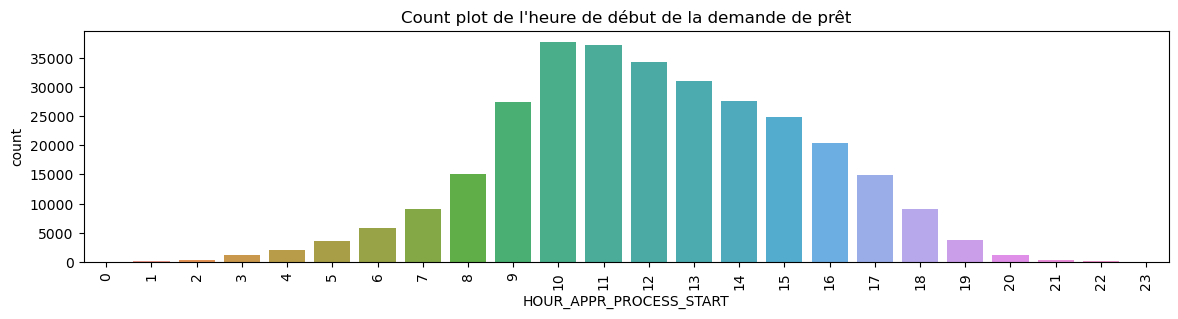

In [85]:
plt.figure(figsize= (14,3))
sns.countplot(x=app_train['HOUR_APPR_PROCESS_START']).set_title("Count plot de l'heure de début de la demande de prêt")
plt.xticks(rotation=90);

In [86]:
# convert to category
app_train['HOUR_APPR_PROCESS_START'] = app_train['HOUR_APPR_PROCESS_START'].astype('object')
app_test['HOUR_APPR_PROCESS_START'] = app_test['HOUR_APPR_PROCESS_START'].astype('object')

## 2.23 Type de région
Signal si l'adresse permanente du client ne correspond pas à l'adresse de contact (1=différent, 0=identique, au niveau de la région)

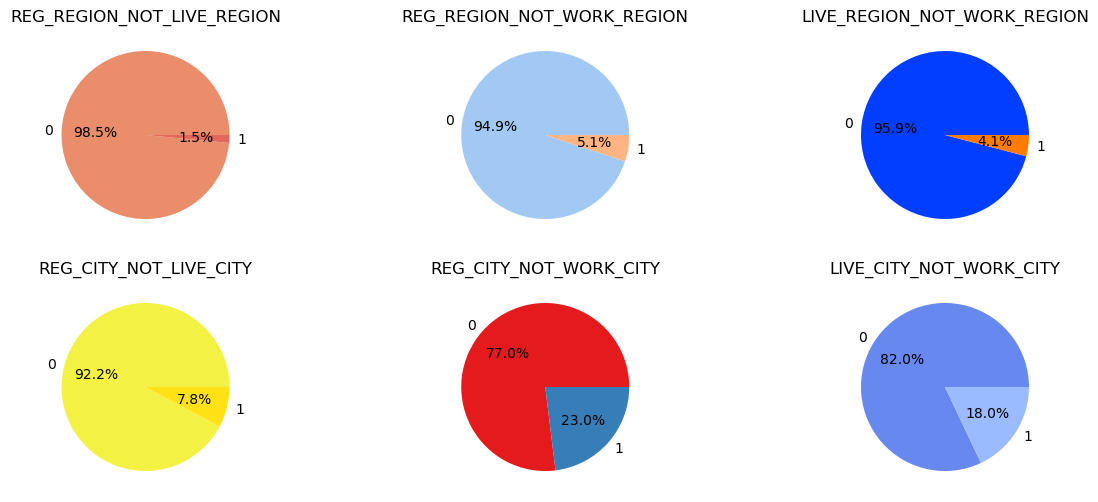

In [89]:
f = plt.figure(figsize= (14,6))

ax= f.add_subplot(231)
tmp = app_train['REG_REGION_NOT_LIVE_REGION'].value_counts()
plt.pie(tmp.values,labels=tmp.index,autopct='%1.1f%%',colors=sns.color_palette('flare'))
ax.set_title('REG_REGION_NOT_LIVE_REGION')

ax = f.add_subplot(232)
tmp = app_train['REG_REGION_NOT_WORK_REGION'].value_counts()
plt.pie(tmp.values,labels=tmp.index,autopct='%1.1f%%',colors=sns.color_palette('pastel'))
ax.set_title('REG_REGION_NOT_WORK_REGION')

ax = f.add_subplot(233)
tmp = app_train['LIVE_REGION_NOT_WORK_REGION'].value_counts()
plt.pie(tmp.values,labels=tmp.index,autopct='%1.1f%%',colors=sns.color_palette('bright'))
ax.set_title('LIVE_REGION_NOT_WORK_REGION')

ax = f.add_subplot(234)
tmp = app_train['REG_CITY_NOT_LIVE_CITY'].value_counts()
plt.pie(tmp.values,labels=tmp.index,autopct='%1.1f%%',colors=sns.color_palette('Wistia'))
ax.set_title('REG_CITY_NOT_LIVE_CITY')

ax = f.add_subplot(235)
tmp = app_train['REG_CITY_NOT_WORK_CITY'].value_counts()
plt.pie(tmp.values,labels=tmp.index,autopct='%1.1f%%',colors=sns.color_palette('Set1'))
ax.set_title('REG_CITY_NOT_WORK_CITY')

ax = f.add_subplot(236)
tmp = app_train['LIVE_CITY_NOT_WORK_CITY'].value_counts()
plt.pie(tmp.values,labels=tmp.index,autopct='%1.1f%%',colors=sns.color_palette('coolwarm'))
ax.set_title('LIVE_CITY_NOT_WORK_CITY')

plt.subplots_adjust(wspace=0.4)

In [90]:
# drop a feature
app_train_col_drop.append('REG_REGION_NOT_LIVE_REGION')

# convert to category
app_train[['REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']] = app_train[['REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']].astype('object')

app_test[['REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']] = app_test[['REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']].astype('object')

## 2.24 Type d'organisation
Type d'organisation où le client travaille

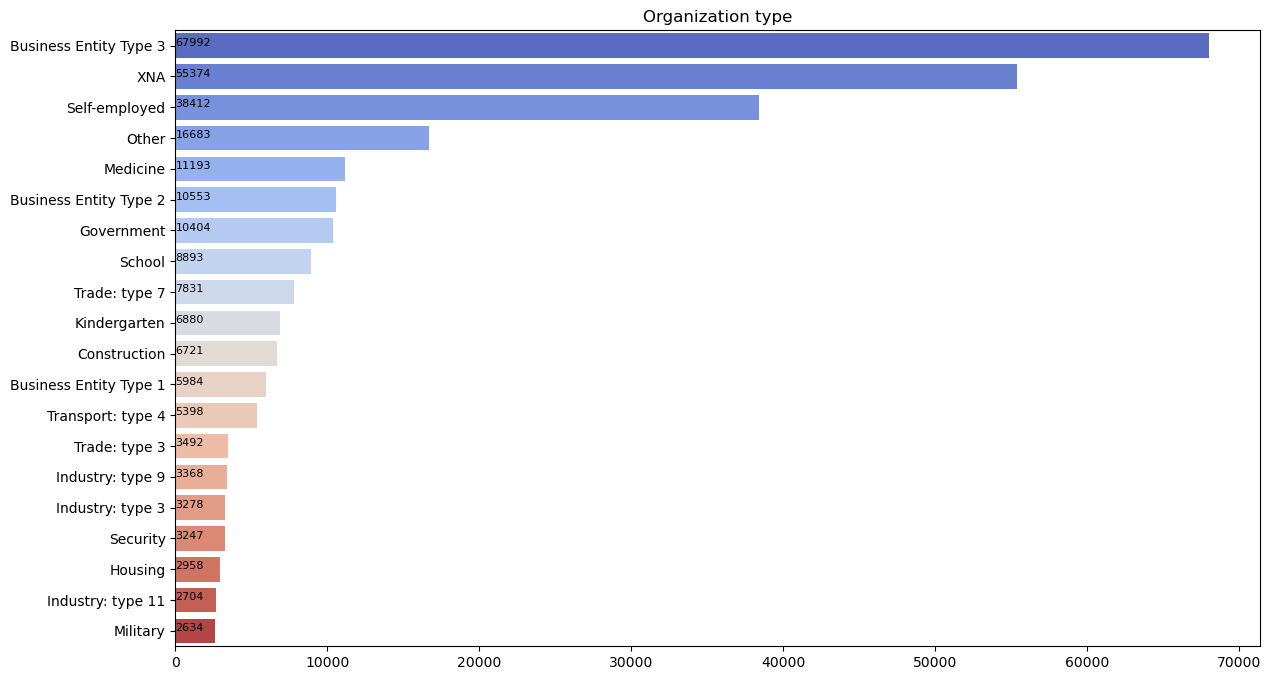

In [93]:
plt.figure(figsize=(14,8))
tmp = app_train['ORGANIZATION_TYPE'].value_counts()[:20]
sns.barplot(x=tmp.values, y=tmp.index, palette='coolwarm')
plt.title('Organization type')
for i,v in enumerate(tmp.values):
    plt.text(1,i,v,fontsize=8,color='k')

In [94]:
# XNA is missing value in dataset
app_train['ORGANIZATION_TYPE'].replace('XNA',np.nan,inplace=True)
app_test['ORGANIZATION_TYPE'].replace('XNA',np.nan,inplace=True)

# convert to category
app_train['ORGANIZATION_TYPE'] = app_train['ORGANIZATION_TYPE'].astype('object')
app_test['ORGANIZATION_TYPE'] = app_test['ORGANIZATION_TYPE'].astype('object')

## 2.25 Source de données externe
Score normalisé à partir d'une source de données externe

In [95]:
basic_details(app_train[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']])

,missing_value,%missing_value,dtypes,N unique
EXT_SOURCE_1,173378,56.38,float64,114584
EXT_SOURCE_2,660,0.21,float64,119831
EXT_SOURCE_3,60965,19.83,float64,814


<AxesSubplot: title={'center': 'Information about building where client lives'}>

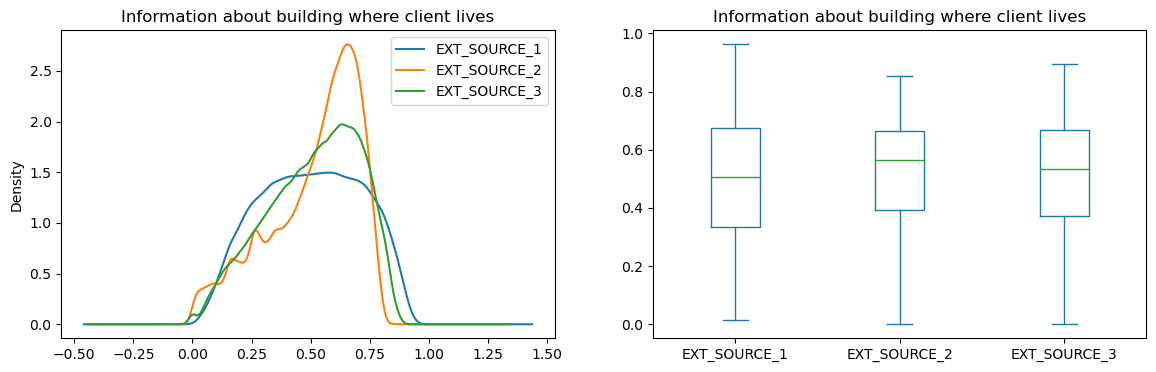

In [102]:
F = plt.figure(figsize=(14,4))
ax = F.add_subplot(121)
plt.title('Information about building where client lives')
app_train[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].plot(kind='kde',ax=ax)

ax = F.add_subplot(122)
plt.title('Information about building where client lives')
app_train[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].plot(kind='box',ax=ax)

## 2.26 Information sur le bâtiment dans lequel le client vit
Informations normalisées sur le bâtiment où vit le client, quelle est la taille moyenne (_AVG suffix), le mode (_MODE suffix), la taille médiane de l'appartement (_MEDI suffix), la zone commune, la surface habitable, l'âge du bâtiment, le nombre d'ascenseurs, le nombre d'entrées, l'état du bâtiment, nombre d'étages

In [99]:
basic_details(app_test[['APARTMENTS_AVG','BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG', 
           'COMMONAREA_AVG', 'ELEVATORS_AVG','ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG']]
)

,missing_value,%missing_value,dtypes,N unique
APARTMENTS_AVG,23887,49.01,float64,1543
BASEMENTAREA_AVG,27641,56.71,float64,2816
YEARS_BEGINEXPLUATATION_AVG,22856,46.89,float64,175
YEARS_BUILD_AVG,31818,65.28,float64,130
COMMONAREA_AVG,33495,68.72,float64,2042
ELEVATORS_AVG,25189,51.68,float64,181
ENTRANCES_AVG,23579,48.37,float64,200
FLOORSMAX_AVG,23321,47.84,float64,252
FLOORSMIN_AVG,32466,66.61,float64,198
LANDAREA_AVG,28254,57.96,float64,2540


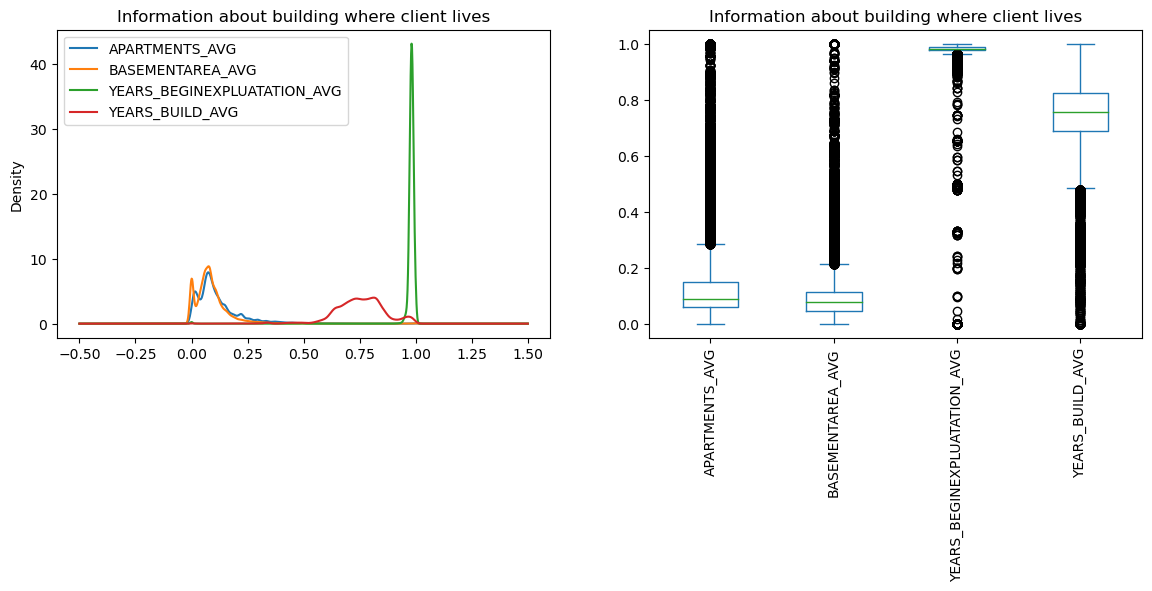

In [103]:
F = plt.figure(figsize=(14,4))
ax = F.add_subplot(121)
plt.title('Information about building where client lives')
app_train[['APARTMENTS_AVG','BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG']].plot(kind='kde',ax=ax)

ax = F.add_subplot(122)
plt.title('Information about building where client lives')
app_train[['APARTMENTS_AVG','BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG']].plot(kind='box',ax=ax)
plt.xticks(rotation=90);

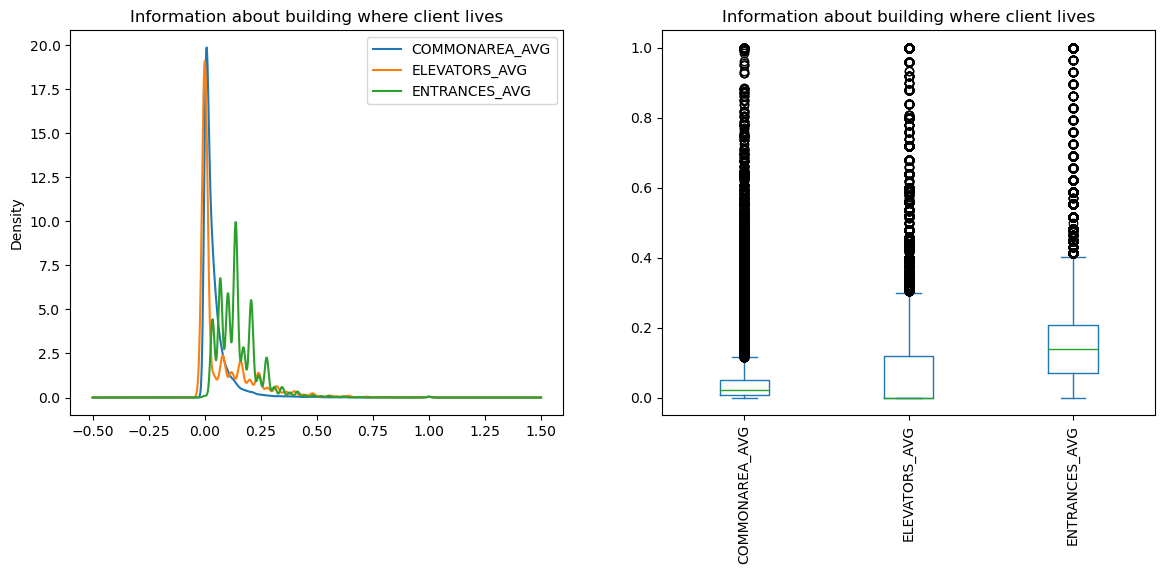

In [104]:
F = plt.figure(figsize=(14,5))
ax = F.add_subplot(121)
plt.title('Information about building where client lives')
app_train[['COMMONAREA_AVG', 'ELEVATORS_AVG','ENTRANCES_AVG',]].plot(kind='kde',ax=ax)

ax = F.add_subplot(122)
plt.title('Information about building where client lives')
app_train[['COMMONAREA_AVG', 'ELEVATORS_AVG','ENTRANCES_AVG',]].plot(kind='box',ax=ax)
plt.xticks(rotation=90);

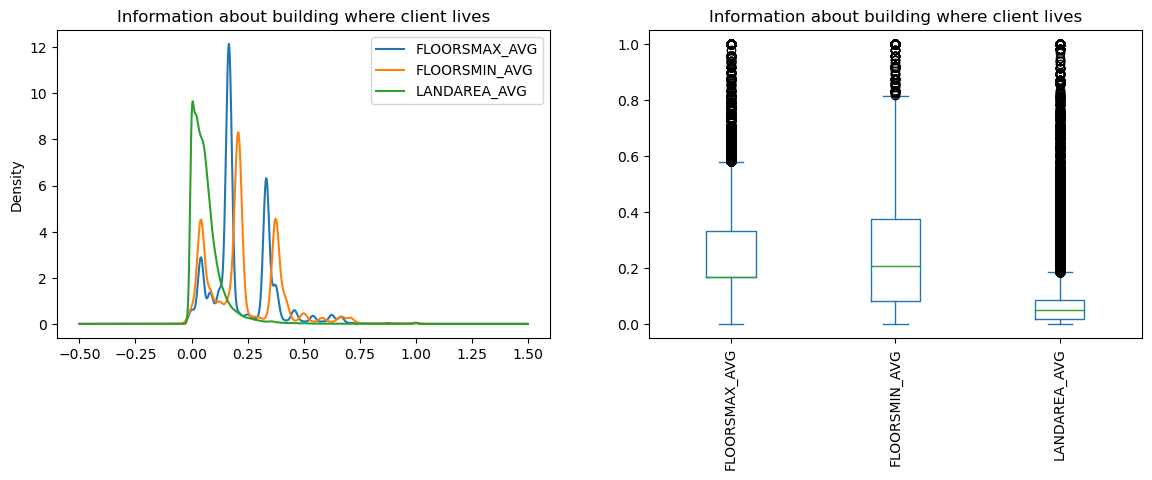

In [105]:
F = plt.figure(figsize=(14,4))
ax = F.add_subplot(121)
plt.title('Information about building where client lives')
app_train[['FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG']].plot(kind='kde',ax=ax)
ax = F.add_subplot(122)

plt.title('Information about building where client lives')
app_train[['FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG']].plot(kind='box',ax=ax)
plt.xticks(rotation=90);

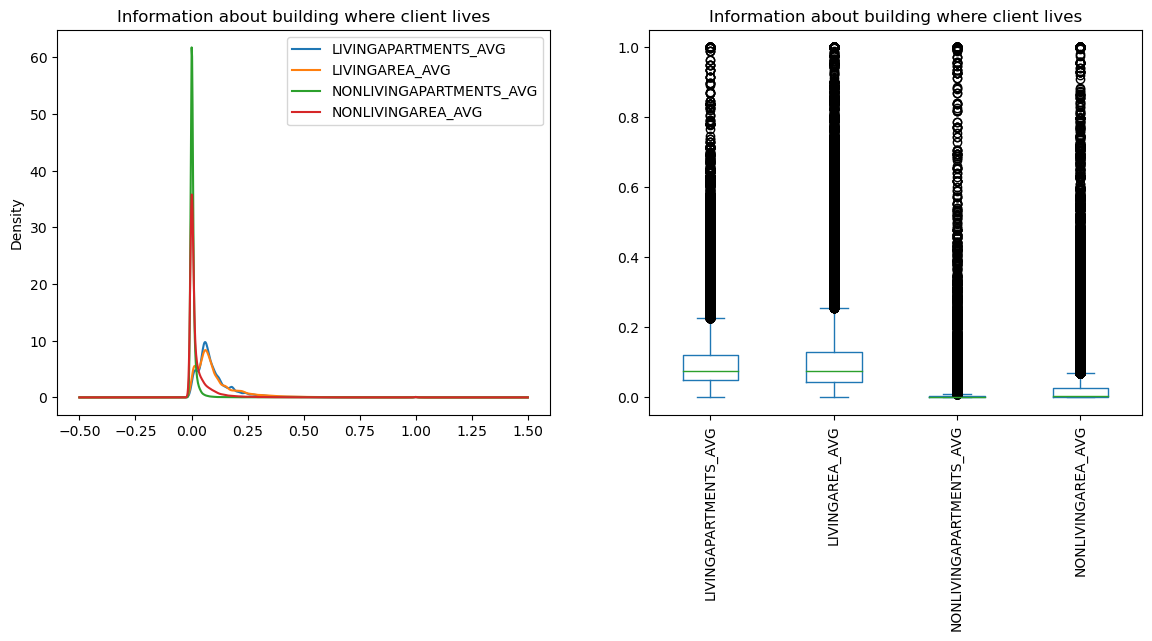

In [106]:
F = plt.figure(figsize=(14,5))
ax = F.add_subplot(121)
plt.title('Information about building where client lives')
app_train[['LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG']].plot(kind='kde',ax=ax)

ax = F.add_subplot(122)
plt.title('Information about building where client lives')
app_train[['LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG']].plot(kind='box',ax=ax)
plt.xticks(rotation=90);

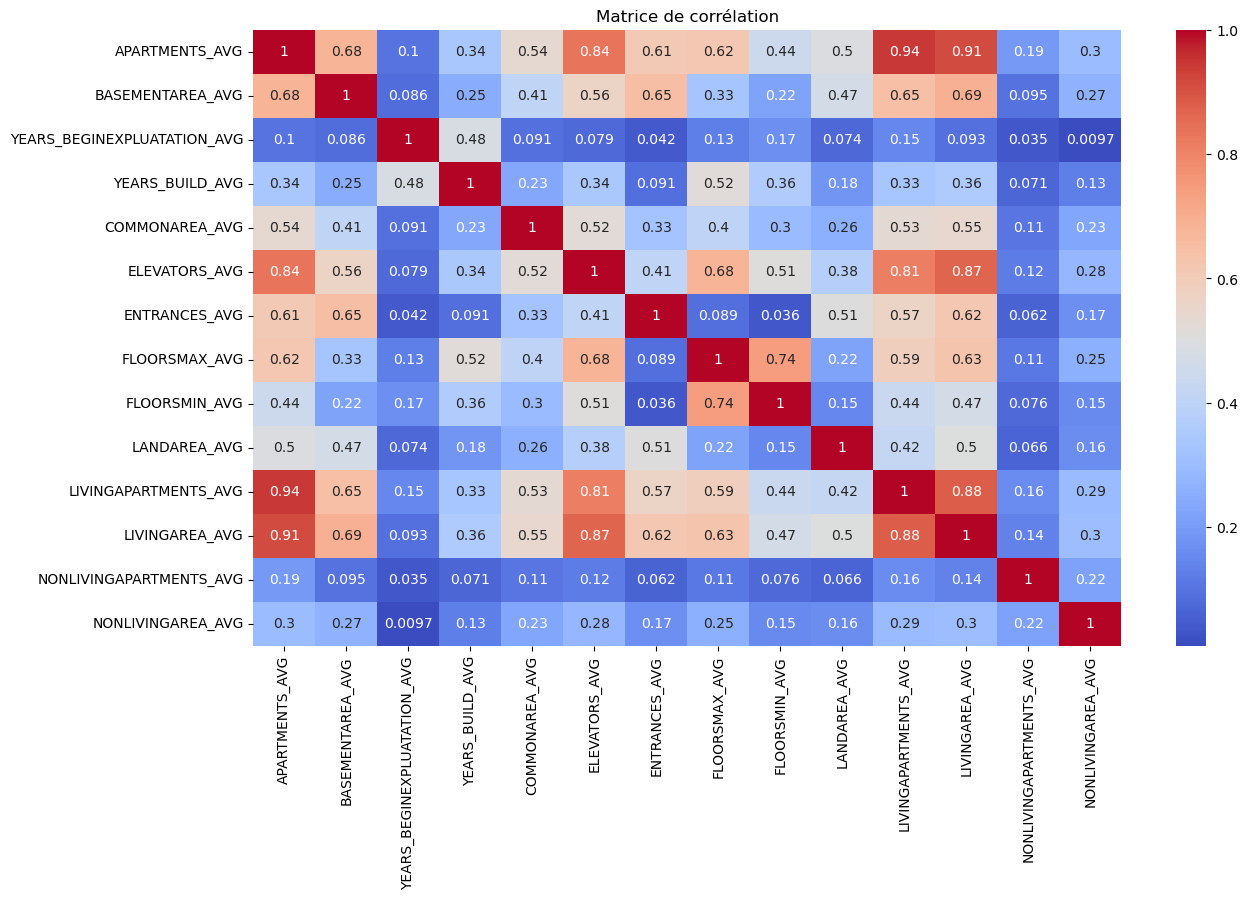

In [107]:
plt.figure(figsize= (14,8))
plt.title('Matrice de corrélation avec les moyennes')
sns.heatmap(app_train[['APARTMENTS_AVG','BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG', 
           'COMMONAREA_AVG', 'ELEVATORS_AVG','ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG']].corr(),
           annot=True, cmap = 'coolwarm');

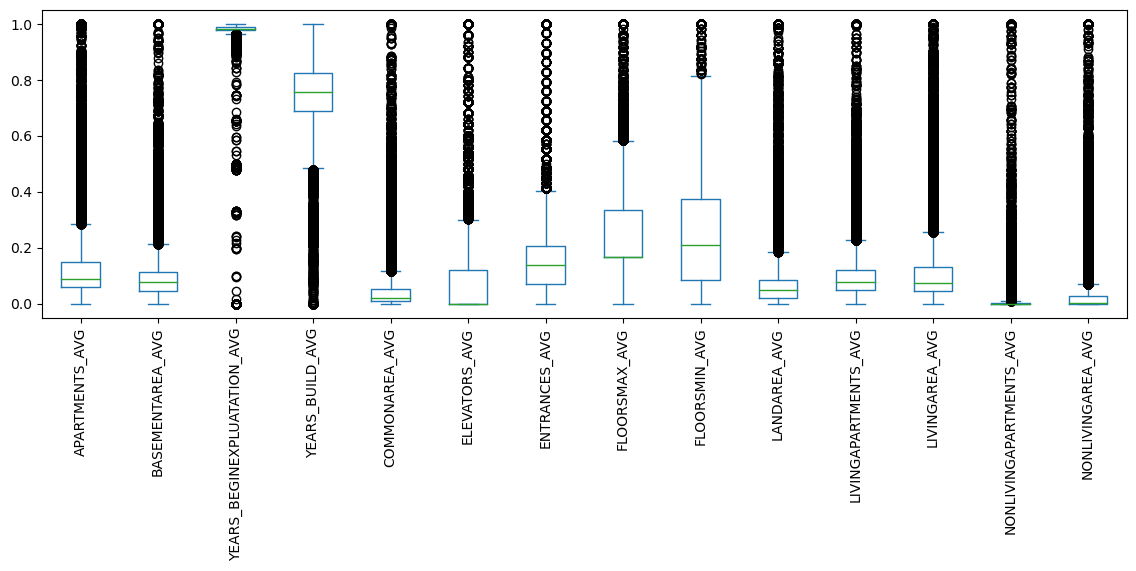

In [108]:
(app_train[['APARTMENTS_AVG','BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG', 
           'COMMONAREA_AVG', 'ELEVATORS_AVG','ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG']]
.plot(kind='box',figsize=(14,4)))
plt.xticks(rotation=90);

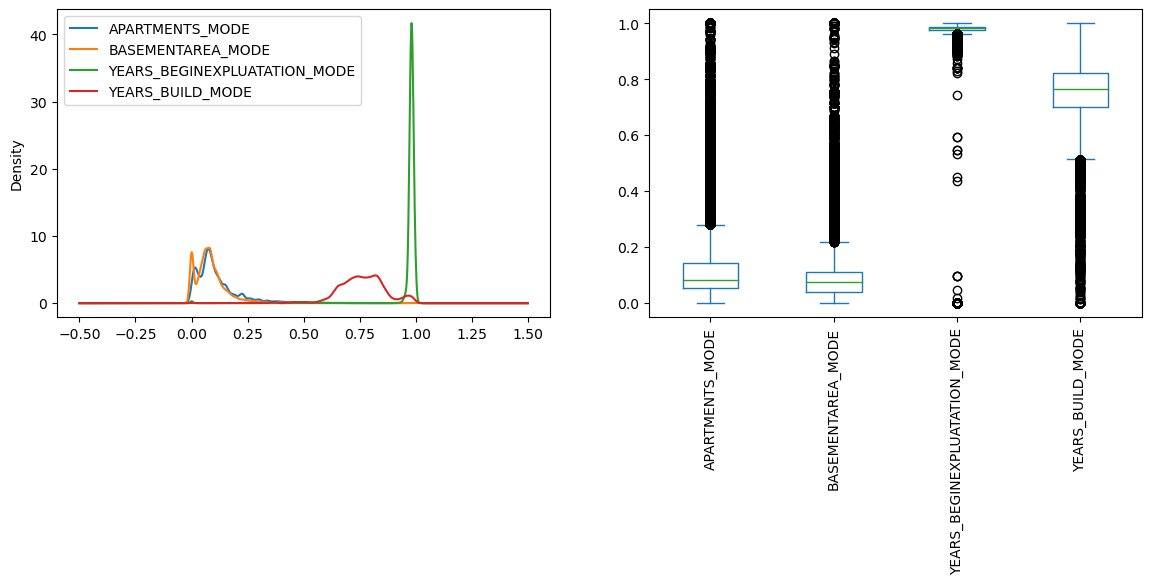

In [114]:
F = plt.figure(figsize=(14,4))
ax = F.add_subplot(121)
app_train[['APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE']].plot(kind='kde',ax=ax)
ax = F.add_subplot(122)
app_train[['APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE']].plot(kind='box',ax=ax)
plt.xticks(rotation=90);

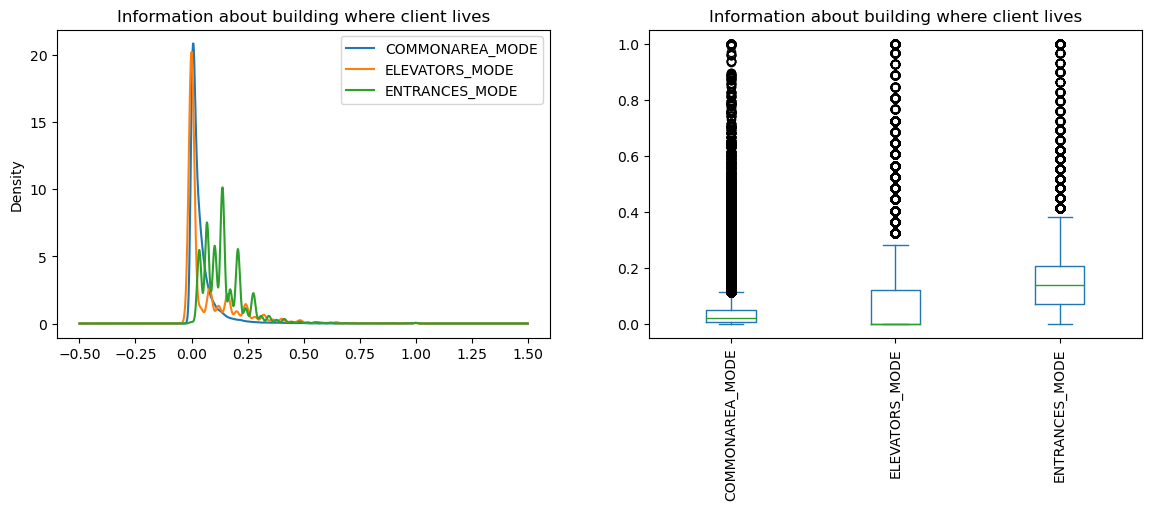

In [115]:
F = plt.figure(figsize=(14, 4))
ax = F.add_subplot(121)
plt.title('Information about building where client lives')
app_train[['COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE',]].plot(kind='kde',ax=ax)

ax = F.add_subplot(122)
plt.title('Information about building where client lives')
app_train[['COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE',]].plot(kind='box',ax=ax)
plt.xticks(rotation=90);

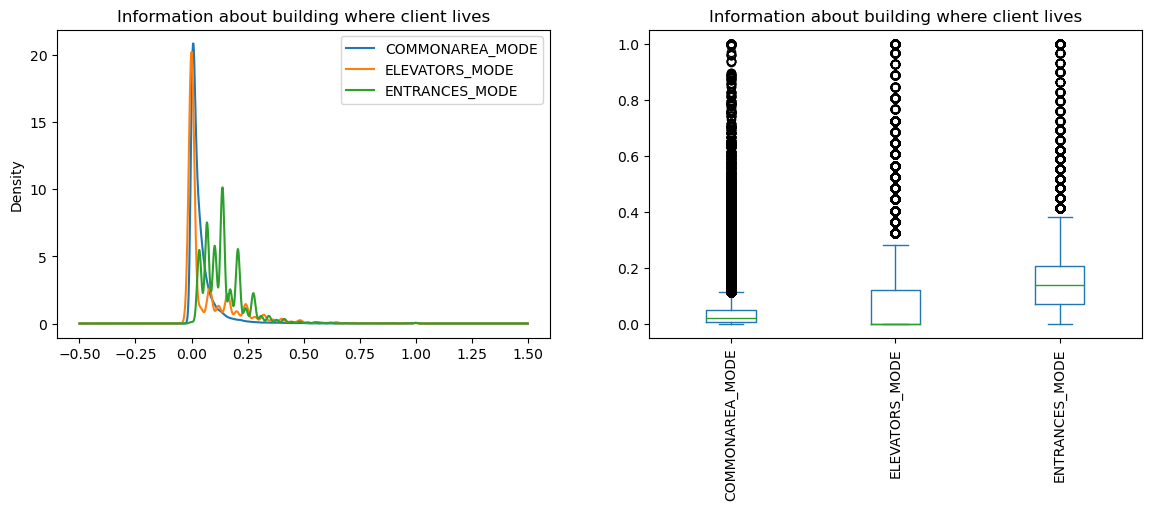

In [116]:
F = plt.figure(figsize=(14, 4))
ax = F.add_subplot(121)
plt.title('Information about building where client lives')
app_train[['COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE',]].plot(kind='kde',ax=ax)

ax = F.add_subplot(122)
plt.title('Information about building where client lives')
app_train[['COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE',]].plot(kind='box',ax=ax)
plt.xticks(rotation=90);

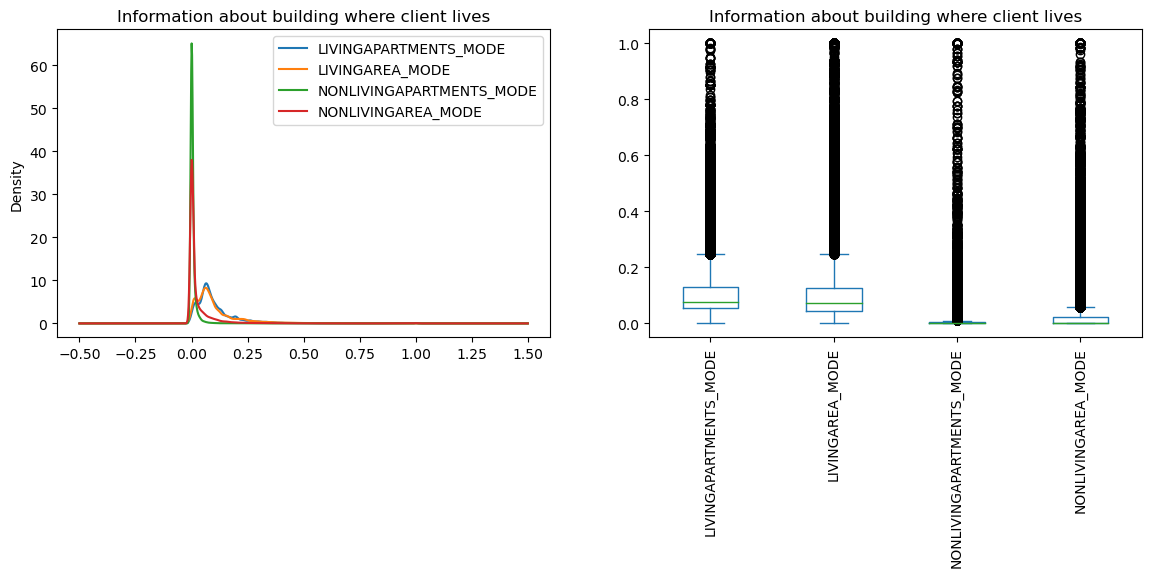

In [117]:
F = plt.figure(figsize=(14, 4))
ax = F.add_subplot(121)
plt.title('Information about building where client lives')
app_train[['LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE']].plot(kind='kde',ax=ax)

ax = F.add_subplot(122)
plt.title('Information about building where client lives')
app_train[['LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE']].plot(kind='box',ax=ax)
plt.xticks(rotation=90);

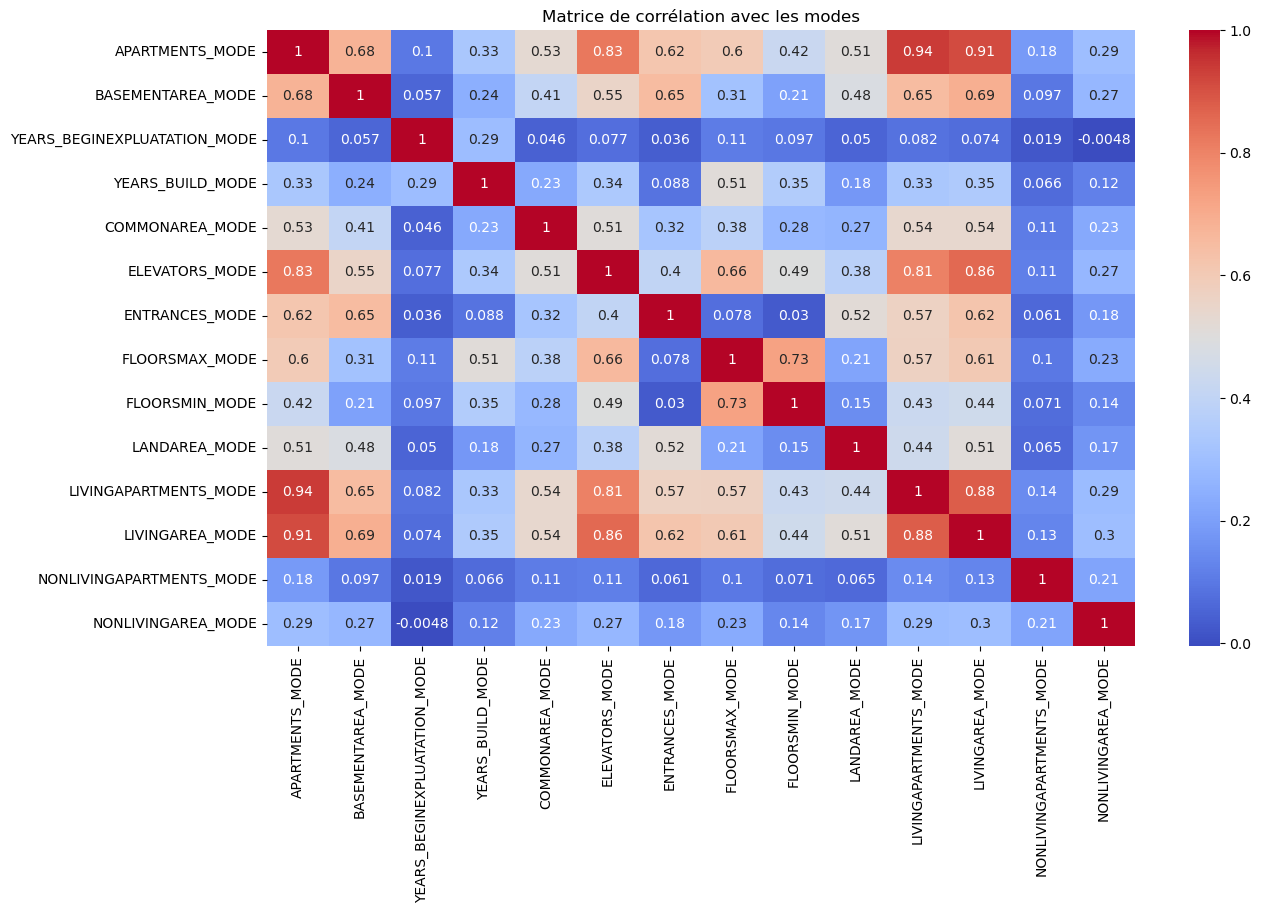

In [118]:
plt.figure(figsize= (14,8))
plt.title('Matrice de corrélation avec les modes')
sns.heatmap(app_train[['APARTMENTS_MODE', 'BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE','FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE']].corr(),
           annot=True, cmap = 'coolwarm');

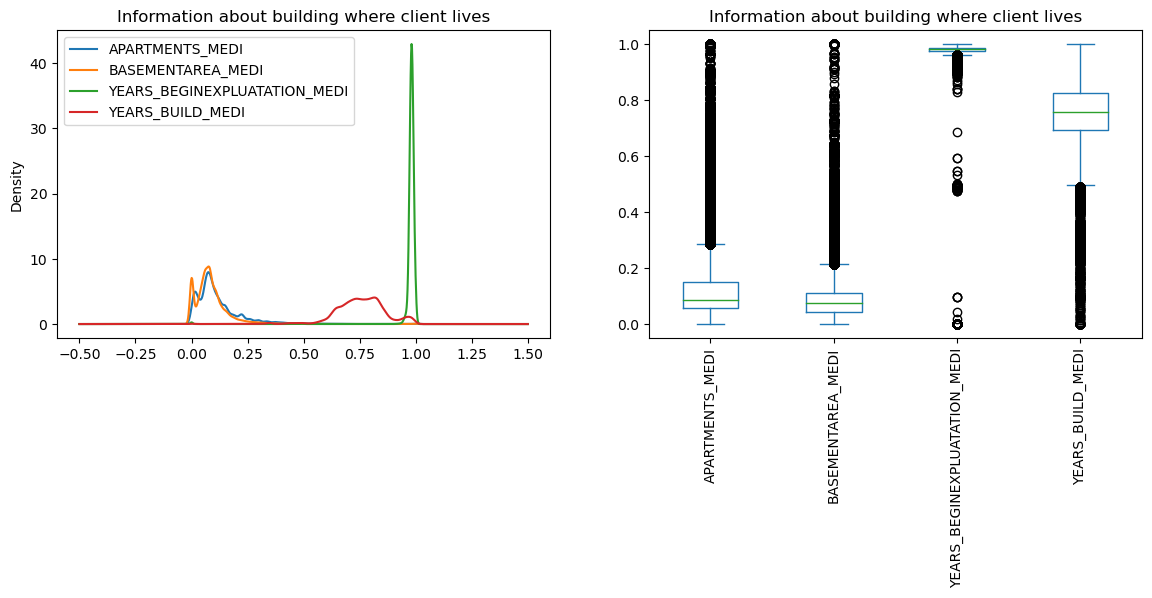

In [119]:
F = plt.figure(figsize=(14, 4))
ax = F.add_subplot(121)
plt.title('Information about building where client lives')
app_train[['APARTMENTS_MEDI','BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI',]].plot(kind='kde',ax=ax)

ax = F.add_subplot(122)
plt.title('Information about building where client lives')
app_train[['APARTMENTS_MEDI','BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI']].plot(kind='box',ax=ax)
plt.xticks(rotation=90);

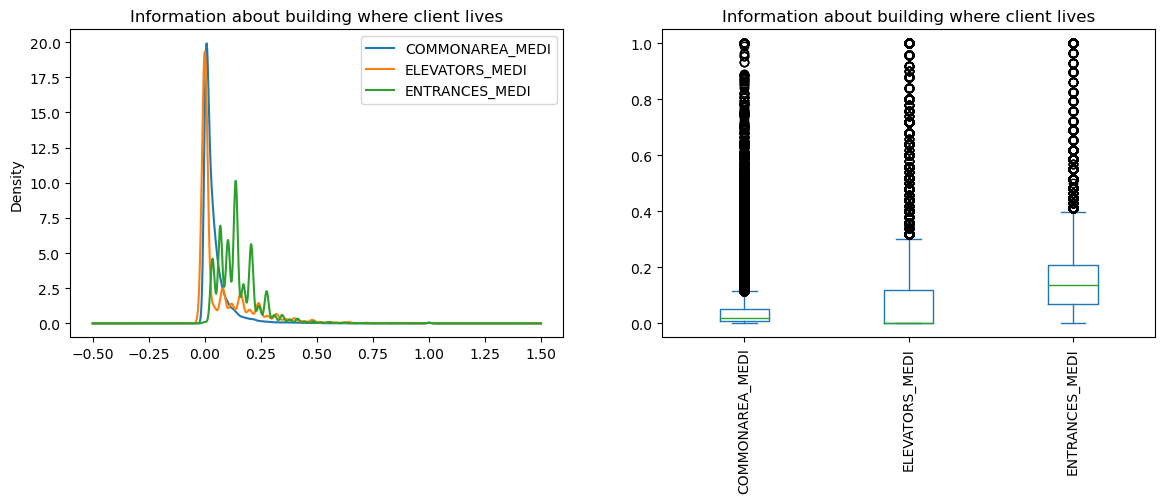

In [120]:
F = plt.figure(figsize=(14, 4))
ax = F.add_subplot(121)
plt.title('Information about building where client lives')
app_train[['COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',]].plot(kind='kde',ax=ax)

ax = F.add_subplot(122)
plt.title('Information about building where client lives')
app_train[['COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI']].plot(kind='box',ax=ax)
plt.xticks(rotation=90);

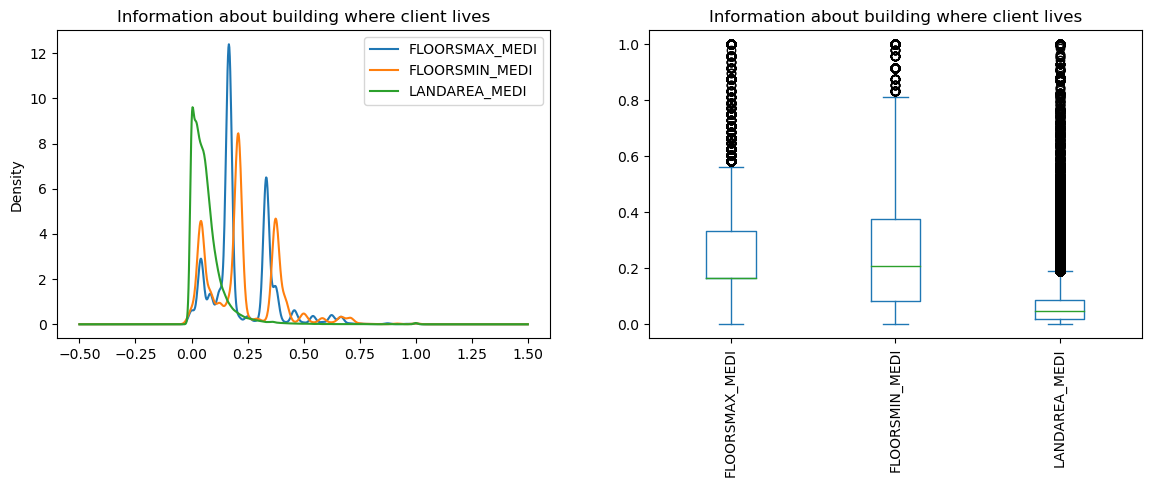

In [121]:
F = plt.figure(figsize=(14, 4))
ax = F.add_subplot(121)
plt.title('Information about building where client lives')
app_train[['FLOORSMAX_MEDI', 'FLOORSMIN_MEDI','LANDAREA_MEDI',]].plot(kind='kde',ax=ax)

ax = F.add_subplot(122)
plt.title('Information about building where client lives')
app_train[['FLOORSMAX_MEDI', 'FLOORSMIN_MEDI','LANDAREA_MEDI',]].plot(kind='box',ax=ax)
plt.xticks(rotation=90);

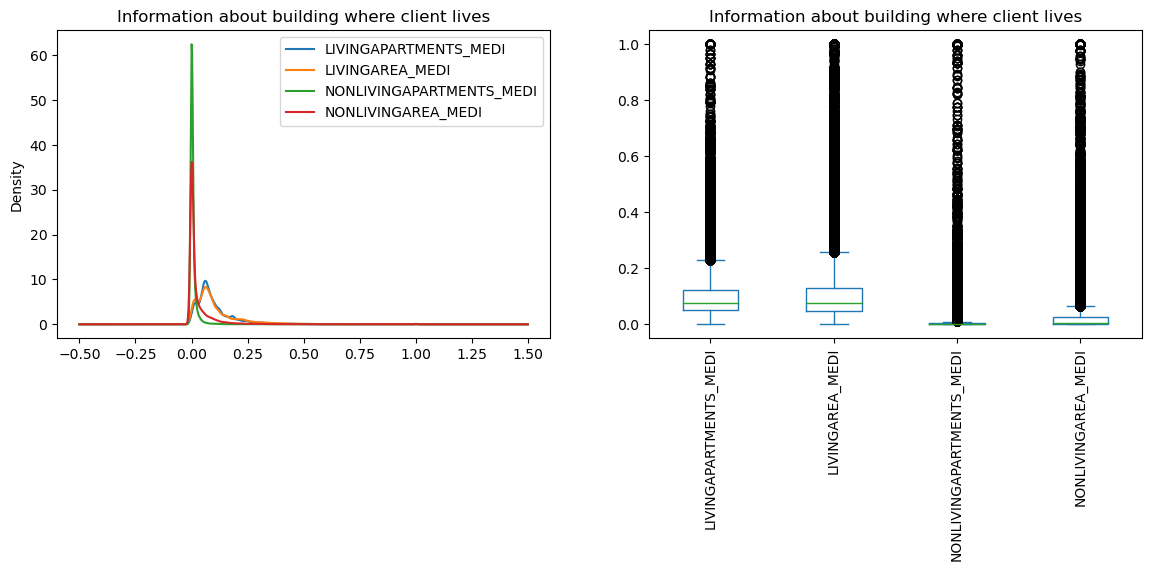

In [122]:
F = plt.figure(figsize=(14, 4))
ax = F.add_subplot(121)
plt.title('Information about building where client lives')
app_train[['LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI']].plot(kind='kde',ax=ax)

ax = F.add_subplot(122)
plt.title('Information about building where client lives')
app_train[['LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI']].plot(kind='box',ax=ax)
plt.xticks(rotation=90);

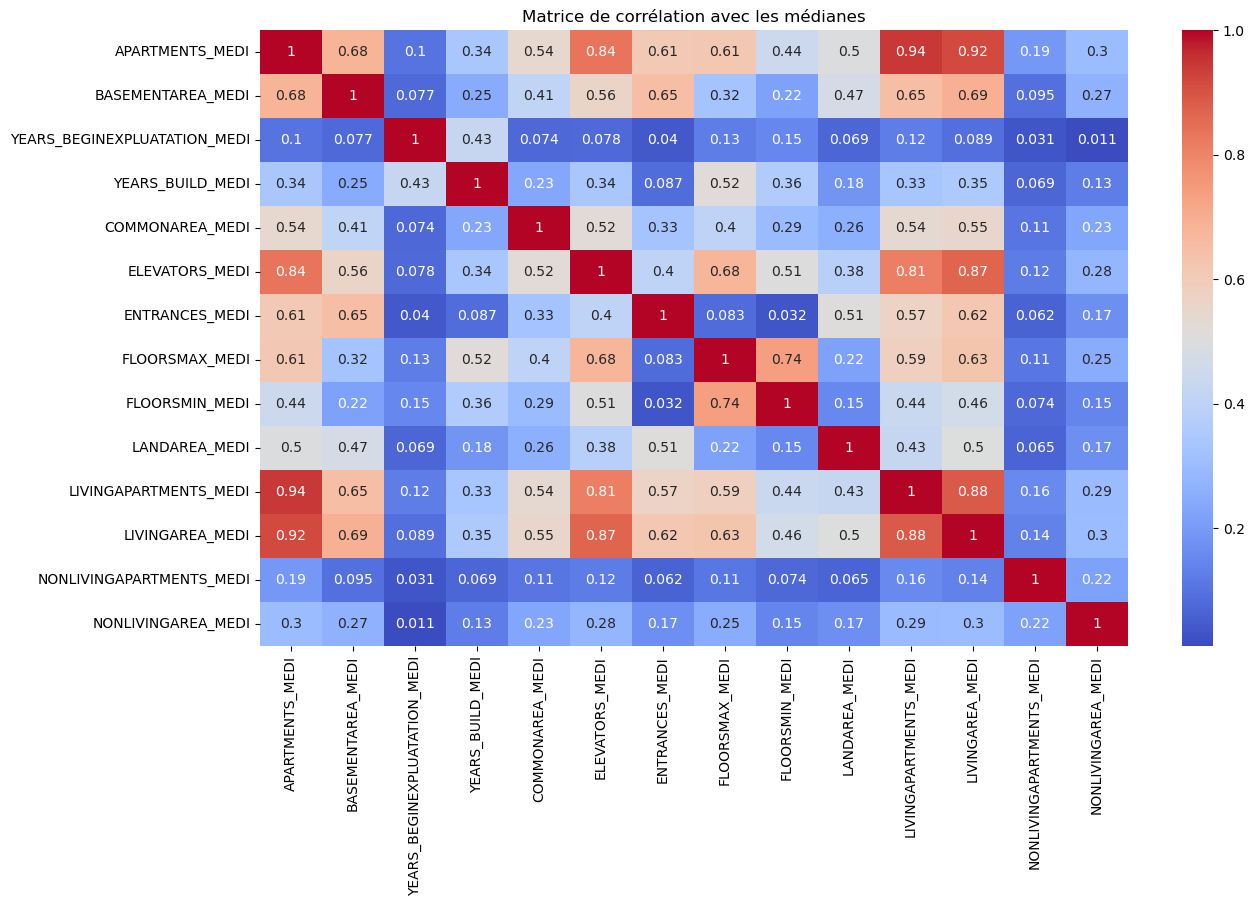

In [123]:
plt.figure(figsize= (14,8))
plt.title('Matrice de corrélation avec les médianes')
sns.heatmap(app_train[['APARTMENTS_MEDI','BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI','ENTRANCES_MEDI', 
        'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI','LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 
        'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',]].corr(),
           annot=True, cmap = 'coolwarm');

## 2.27 Surface totale

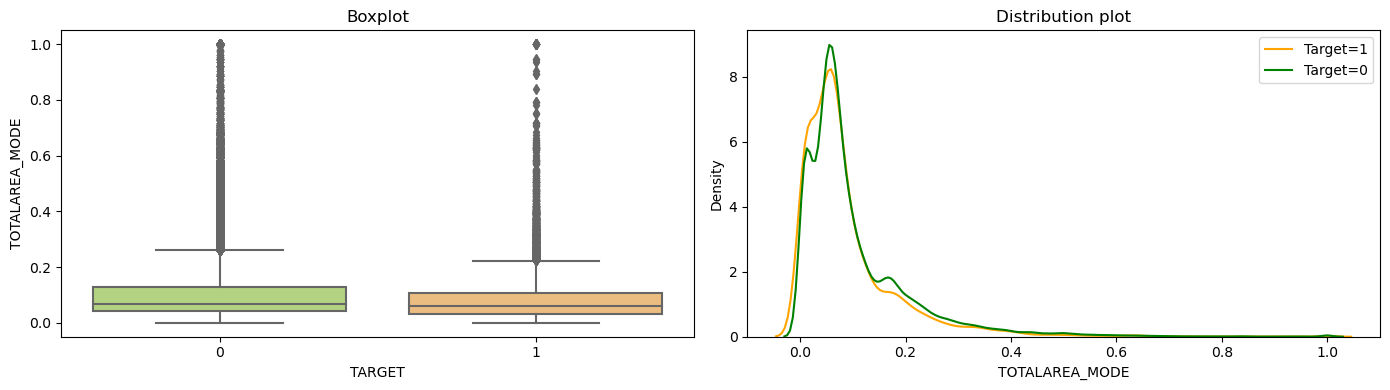

In [124]:
dist_box__plot_with_log(app_train,column='TOTALAREA_MODE',ncols=2)

In [125]:
basic_details(app_train[['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']])

,missing_value,%missing_value,dtypes,N unique
FONDKAPREMONT_MODE,210295,68.39,object,4
HOUSETYPE_MODE,154297,50.18,object,3
WALLSMATERIAL_MODE,156341,50.84,object,7
EMERGENCYSTATE_MODE,145755,47.40,object,2


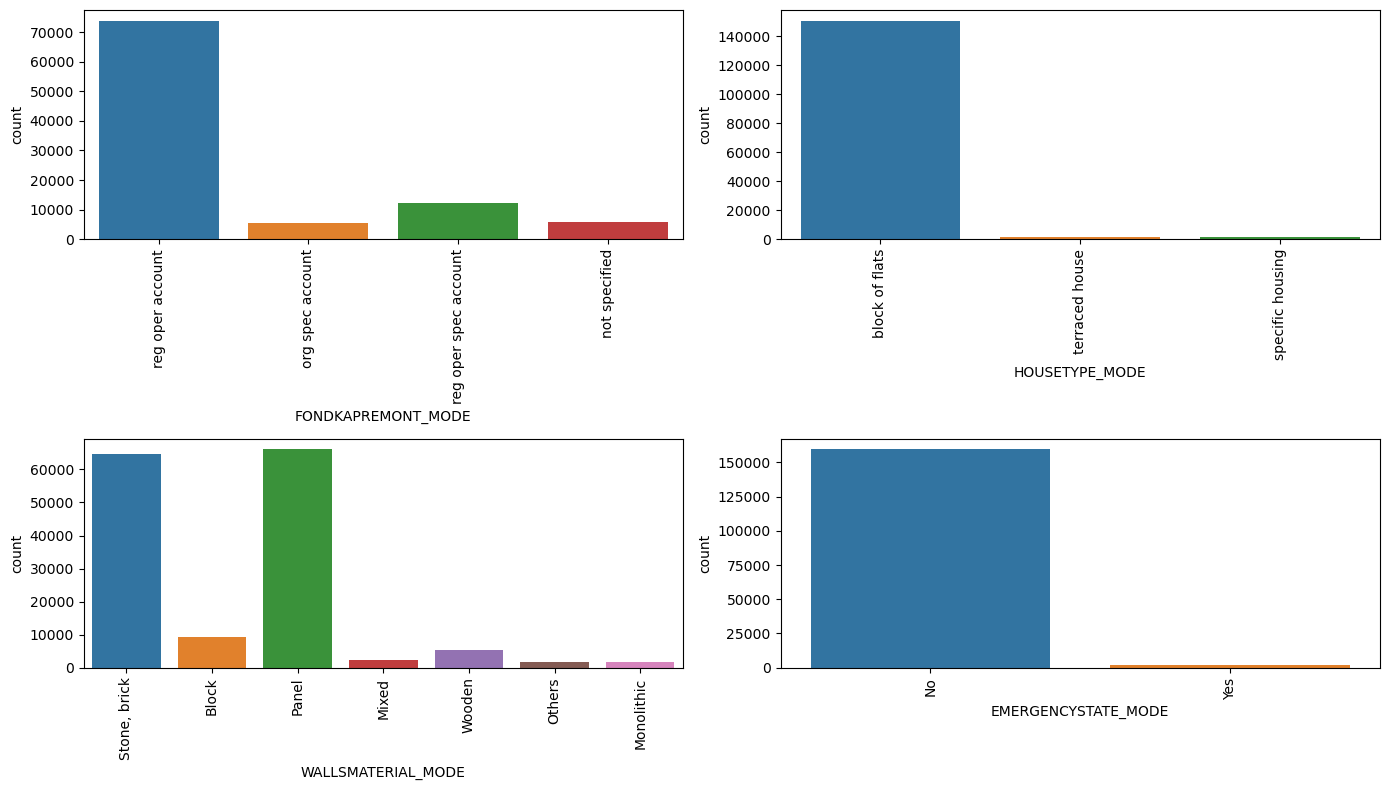

In [127]:
f = plt.figure(figsize= (14,8))
ax = f.add_subplot(221)
sns.countplot(x=app_train['FONDKAPREMONT_MODE'],ax=ax)
plt.xticks(rotation=90)
#plt.title('FONDKAPREMONT_MODE')

ax = f.add_subplot(222)
sns.countplot(x=app_train['HOUSETYPE_MODE'],ax=ax)
plt.xticks(rotation=90)
#plt.title('HOUSETYPE_MODE')

ax = f.add_subplot(223)
sns.countplot(x=app_train['WALLSMATERIAL_MODE'],ax=ax)
plt.xticks(rotation=90)
#plt.title('WALLSMATERIAL_MODE')

ax = f.add_subplot(224)
sns.countplot(x=app_train['EMERGENCYSTATE_MODE'],ax=ax)
plt.xticks(rotation=90)
#plt.title('EMERGENCYSTATE_MODE')

plt.tight_layout()

In [128]:
app_train[['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']] = app_train[['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']].astype('object')

app_test[['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']] = app_test[['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']].astype('object')

## 2.28 Observation de l'environnement social des clients

In [129]:
basic_details(app_train[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE',]])

,missing_value,%missing_value,dtypes,N unique
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.33,float64,33
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.33,float64,10
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.33,float64,33
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.33,float64,9
DAYS_LAST_PHONE_CHANGE,1,0.00,float64,3773


<AxesSubplot: xlabel='DEF_60_CNT_SOCIAL_CIRCLE', ylabel='count'>

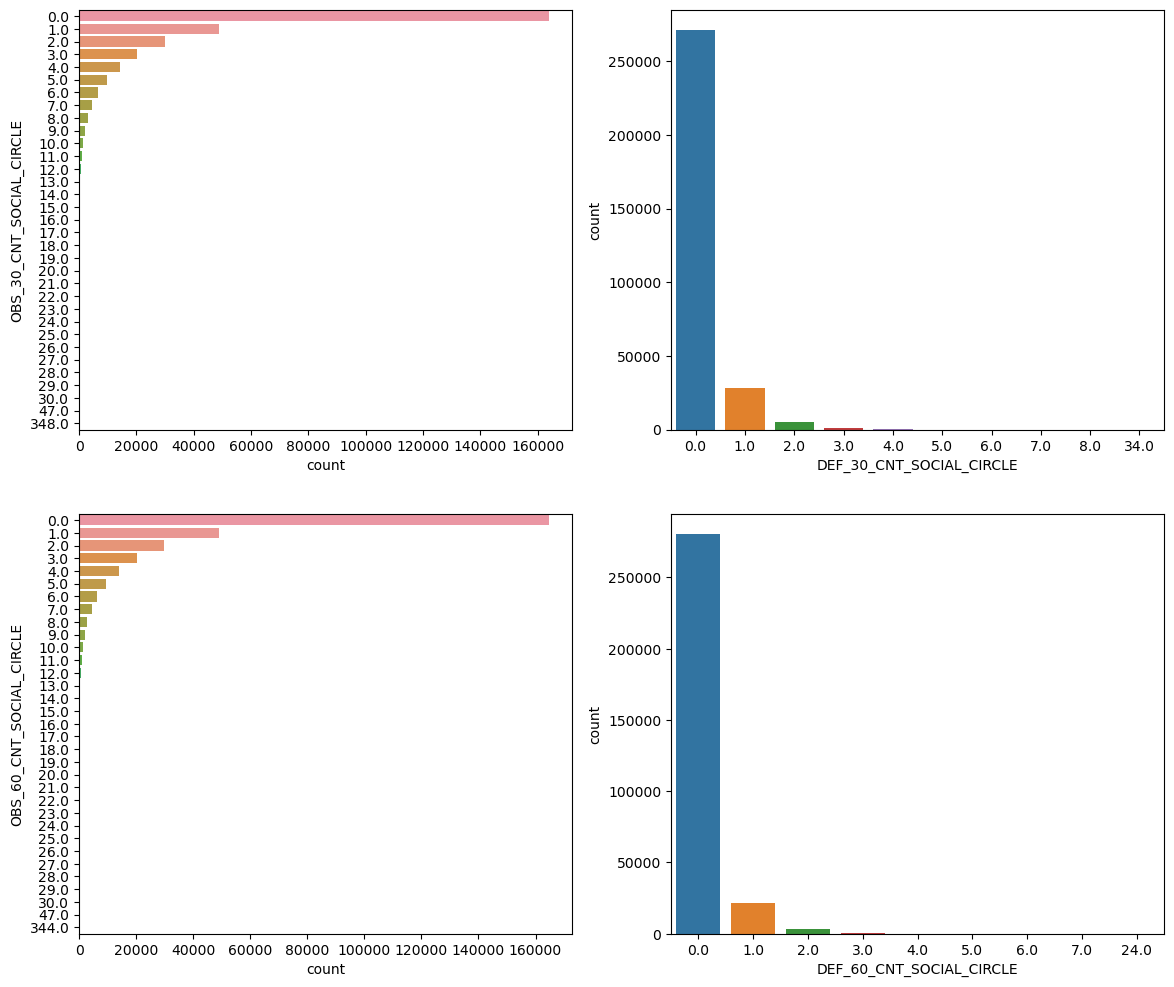

In [138]:
f = plt.figure(figsize= (14,12))
ax = f.add_subplot(221)
sns.countplot(y=app_train['OBS_30_CNT_SOCIAL_CIRCLE'], data=app_train, ax=ax)

ax = f.add_subplot(222)
sns.countplot(x=app_train['DEF_30_CNT_SOCIAL_CIRCLE'], ax=ax)

ax = f.add_subplot(223)
sns.countplot(y=app_train['OBS_60_CNT_SOCIAL_CIRCLE'], data=app_train, ax=ax)

ax = f.add_subplot(224)
sns.countplot(x=app_train['DEF_60_CNT_SOCIAL_CIRCLE'], ax=ax)

In [139]:
# convert to category
app_train[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',]] = app_train[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',]].astype('object')

app_test[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',]] = app_test[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',]].astype('object')

## 2.29 Jour du dernier changement de téléphone
Combien de jours avant l'application le client a-t-il changé de téléphone

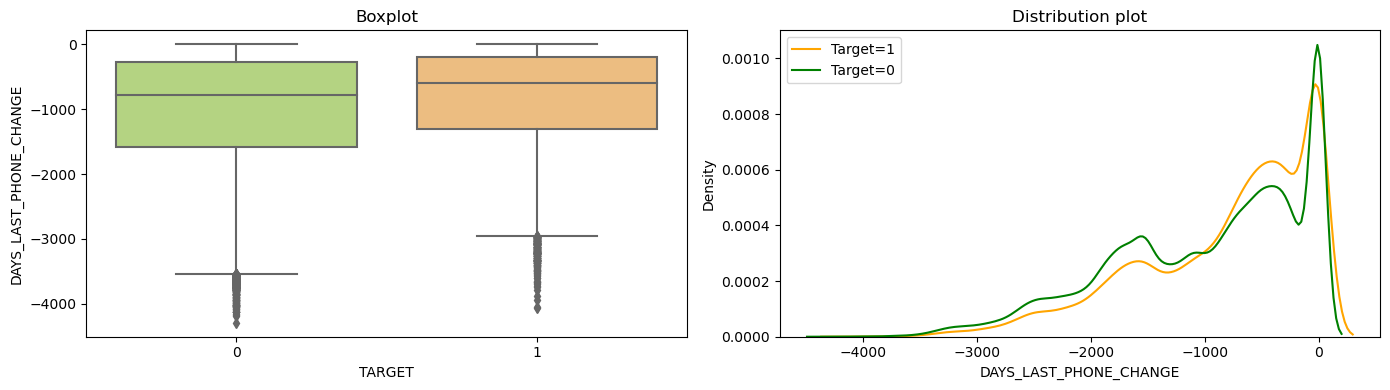

In [140]:
dist_box__plot_with_log(app_train,column='DAYS_LAST_PHONE_CHANGE',ncols=2)

## 2.30 Documents fournis
Est-ce que le client a fourni certains documents ou non

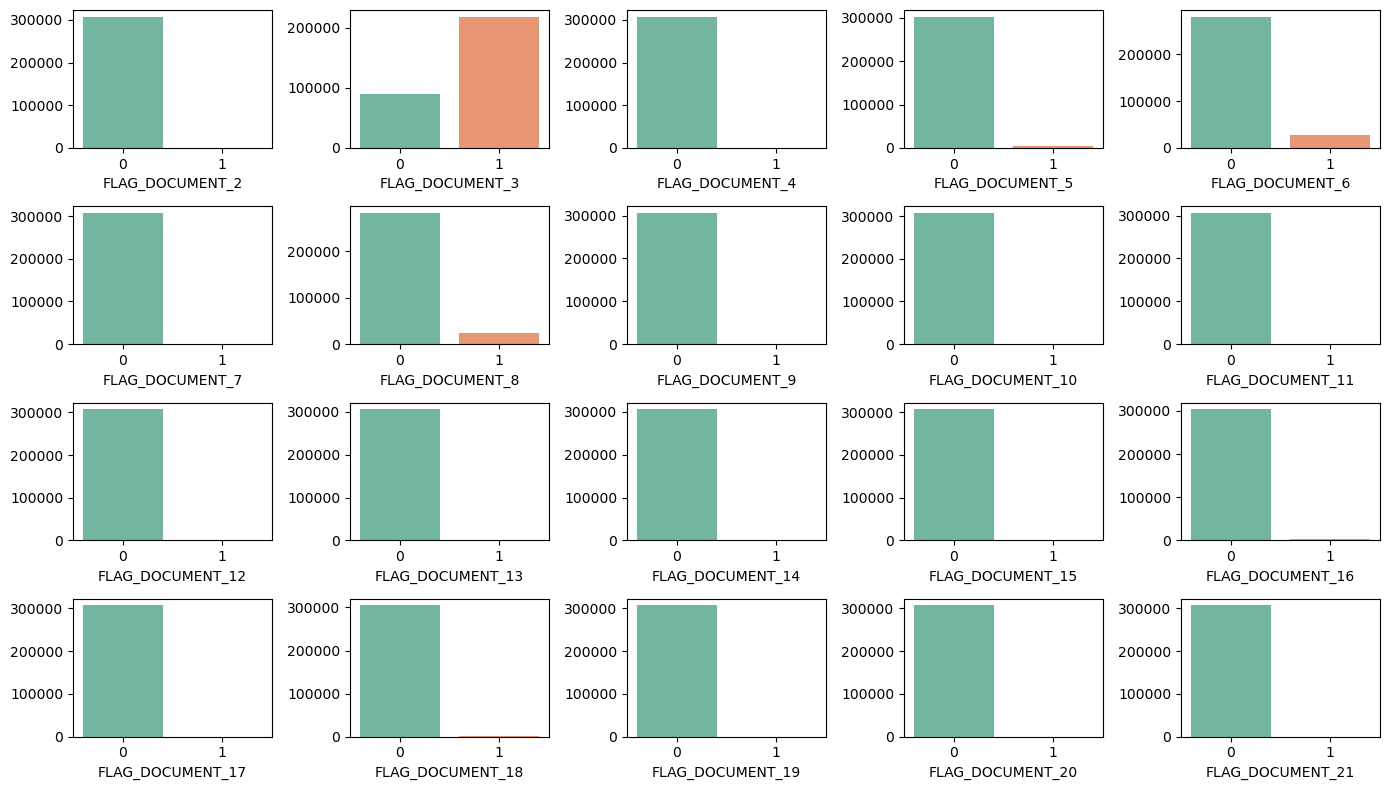

In [144]:
flag_col = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
        'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 
        'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',]

fig, ax = plt.subplots(4,5, figsize=(14,8),sharey=False)
axs = ax.ravel()
for i,c in enumerate(flag_col):
    sns.countplot(x=app_train[c],ax = axs[i],palette='Set2')
    axs[i].set_ylabel('')
plt.tight_layout()

In [145]:
# we will keep FLAG_DOCUMENT_3,FLAG_DOCUMENT_6, FLAG_DOCUMENT_8
app_train[['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
        'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 
        'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',]]  = app_train[['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
        'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 
        'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',]].astype('object')

app_test[['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
        'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 
        'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',]]  = app_test[['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
        'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 
        'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',]].astype('object')


app_train_col_drop.extend(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_7',  'FLAG_DOCUMENT_9',
        'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 
        'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'])

## 2.31 Nombre de demandes de renseignements au bureau de crédit au sujet du client

In [146]:
basic_details(app_train[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']])

,missing_value,%missing_value,dtypes,N unique
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.5,float64,5
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.5,float64,9
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.5,float64,9
AMT_REQ_CREDIT_BUREAU_MON,41519,13.5,float64,24
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.5,float64,11
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.5,float64,25


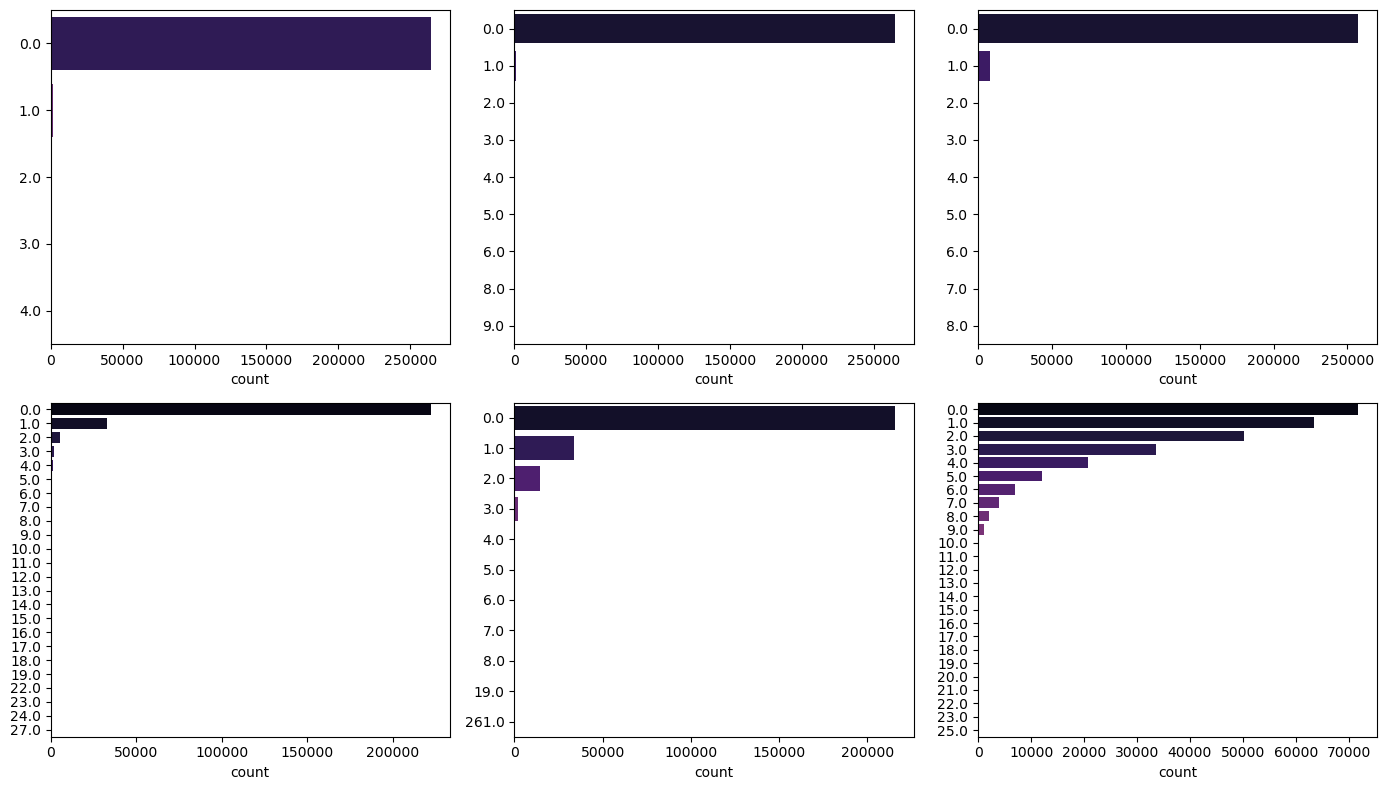

In [155]:
flag_col = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',]

fig, ax = plt.subplots(2,3, figsize=(14,8),sharey=False)
axs = ax.ravel()
for i,c in enumerate(flag_col):
    sns.countplot(y=app_train[c],data=app_train,ax = axs[i],palette='magma')
    axs[i].set_ylabel('')
plt.tight_layout()

In [156]:
app_train[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 
    'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',]] = app_train[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 
    'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',]].astype('object')

app_test[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',]] = app_test[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 
    'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',]].astype('object')